# Selección de cripto activos para una cartera de inversión

<img src='https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/imagen_tapa.jpg'/>

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import itertools

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/BTCUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [ ]:
df.tail()

,open,close,high,low,volume
2021-05-16 11:00:00,49574.98,49014.99,49640.28,48912.80,2464.233967
2021-05-16 12:00:00,49014.99,48622.62,49157.89,48550.63,2925.555177
2021-05-16 13:00:00,48618.14,48915.73,48999.10,48457.06,3053.929148
2021-05-16 14:00:00,48915.78,48284.32,49249.06,48036.00,3836.376897
2021-05-16 15:00:00,48284.32,48013.72,48331.45,47660.09,2315.780180


#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# ¡Actividades!


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

## Parte I

- Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de computarlos (por ejemplo, splines). Para discutir: ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?

- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features.

- Seleccionen un activo y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos.

- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.


## Parte II

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico. 

- Agreguen la serie de tasas de rendimiento para el precio close de cada activo. 

- Calculen las medias móviles de los precios tomando n periodos hacia atrás. 

- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.

- Además, pueden crear indicadores personalizados, que ayudarán a que la predicción sea más precisa. Por ejemplo:

```
# Calculate 3 day moving average of close prices
df['S_3'] = df['close'].shift(1).rolling(window=3).mean()

# Calculate 15 day moving average of close prices
df['S_15'] = df['close'].shift(1).rolling(window=15).mean()

# Calculate 60 day moving average of close prices
df['S_60'] = df['close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
df['Corr'] = df['close'].shift(1).rolling(window=10).corr(df['S_3'].shift(1))

df['Std_U'] = df['high']-df['open']
df['Std_D'] = df['open']-df['low']

df['OD'] = df['open']-df['open'].shift(1)
df['OL'] = df['open']-df['close'].shift(1)
```
entre otros, S_3, S_15 y S_60 corresponde a las medias móviles de 3, 15 y 60 periodos. Además, se calcula la correlación entre los precios de cierre y la media móvil de 3 periodos

**¿Qué roll cumple la función shift()? ¿Es necesario aplicarla en todos los features que calculamos?**

## Parte III

- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia? ¿Cuál elegirían aplicar?

## Parte IV - Opcional

- Para alguno/s de los activos, detecte las correlaciones entre los features generados utilizando la función Heatmap().


**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 1/7__ 

- __Versión final: 4/7__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [ ]:
csv_paths = {'AAVEUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/AAVEUSDT.csv',
             'ADAUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/ADAUSDT.csv',
             'BCHUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/BCHUSDT.csv',
             'BNBUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/BNBUSDT.csv',
             'BTCUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/BTCUSDT.csv',
             'COMPUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/COMPUSDT.csv',
             'DASHUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/DASHUSDT.csv',
             'DOTUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/DOTUSDT.csv',
             'EOSUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/EOSUSDT.csv',
             'ETCUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/ETCUSDT.csv',
             'ETHUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/ETHUSDT.csv',
             'LINKUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/LINKUSDT.csv',
             'LTCUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/LTCUSDT.csv',
             'MKRUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/MKRUSDT.csv',
             'NEOUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/NEOUSDT.csv',
             'XMRUSDT': 'https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2021/master/data/XMRUSDT.csv'}

In [ ]:
cryptos = dict()
for coin, path in csv_paths.items():
    cryptos[coin] = pd.read_csv(path, index_col=0, parse_dates=True, dayfirst= True)
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

# Parte 1


## 1.4

Dado que tener la información almacenada o presentada de otra manera puede ser beneficioso para el resto de los puntos del trabajo, decidimos comenzar por este punto, de manera de generar un dataframe para cada variable respectiva (open, high, low, close, volume), donde el índice sigue siendo la fecha y cada columna se corresponde con una criptodivisa. De esta manera podremos trabajar más cómodamente en el procesado de la información. 

También generamos un único dataframe con toda la información concatenada a nivel columnas, de manera de procesar todo junto de ser necesario. Es incierto si lo usaremos, pero el esfuerzo es mínimo, así que está disponible.

In [ ]:
# df por variable
open_criptos = pd.DataFrame(index=cryptos['BTCUSDT'].index, columns=cryptos.keys()) #BTC es una de las más antiguas, por ende posee todos los índices de tiempo.
high_criptos = open_criptos.copy()
low_criptos = open_criptos.copy()
close_criptos = open_criptos.copy()
volume_criptos = open_criptos.copy()

for i in cryptos.keys():
    open_criptos[i] = cryptos[i].open
    close_criptos[i] = cryptos[i].close
    high_criptos[i] = cryptos[i].high
    low_criptos[i] = cryptos[i].low
    close_criptos[i] = cryptos[i].close
    volume_criptos[i] = cryptos[i].volume

In [ ]:
open_criptos.head()

,AAVEUSDT,ADAUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,MKRUSDT,NEOUSDT,XMRUSDT
2018-01-01 00:00:00,NaN,NaN,NaN,8.5478,13715.65,NaN,NaN,NaN,NaN,NaN,733.01,NaN,223.69,NaN,74.854,NaN
2018-01-01 01:00:00,NaN,NaN,NaN,8.3558,13528.99,NaN,NaN,NaN,NaN,NaN,727.01,NaN,219.25,NaN,72.788,NaN
2018-01-01 02:00:00,NaN,NaN,NaN,8.2200,13203.00,NaN,NaN,NaN,NaN,NaN,717.67,NaN,212.75,NaN,72.720,NaN
2018-01-01 03:00:00,NaN,NaN,NaN,8.2972,13330.26,NaN,NaN,NaN,NaN,NaN,723.95,NaN,215.71,NaN,73.990,NaN
2018-01-01 04:00:00,NaN,NaN,NaN,8.3612,13434.98,NaN,NaN,NaN,NaN,NaN,734.99,NaN,218.12,NaN,74.459,NaN


In [ ]:
# df completo
df_full = pd.DataFrame(index=cryptos['BTCUSDT'].index)
for i in cryptos.keys():
    df_ = cryptos[i].copy()
    cols = [f'{i}_{c}' for c in df_.columns]
    df_.columns = cols
    df_full = pd.concat([df_full, df_], axis=1)

In [ ]:
df_full.tail(5)

,AAVEUSDT_open,AAVEUSDT_close,AAVEUSDT_high,AAVEUSDT_low,AAVEUSDT_volume,ADAUSDT_open,ADAUSDT_close,ADAUSDT_high,ADAUSDT_low,ADAUSDT_volume,BCHUSDT_open,BCHUSDT_close,BCHUSDT_high,BCHUSDT_low,BCHUSDT_volume,BNBUSDT_open,BNBUSDT_close,BNBUSDT_high,BNBUSDT_low,BNBUSDT_volume,BTCUSDT_open,BTCUSDT_close,BTCUSDT_high,BTCUSDT_low,BTCUSDT_volume,COMPUSDT_open,COMPUSDT_close,COMPUSDT_high,COMPUSDT_low,COMPUSDT_volume,DASHUSDT_open,DASHUSDT_close,DASHUSDT_high,DASHUSDT_low,DASHUSDT_volume,DOTUSDT_open,DOTUSDT_close,DOTUSDT_high,DOTUSDT_low,DOTUSDT_volume,EOSUSDT_open,EOSUSDT_close,EOSUSDT_high,EOSUSDT_low,EOSUSDT_volume,ETCUSDT_open,ETCUSDT_close,ETCUSDT_high,ETCUSDT_low,ETCUSDT_volume,ETHUSDT_open,ETHUSDT_close,ETHUSDT_high,ETHUSDT_low,ETHUSDT_volume,LINKUSDT_open,LINKUSDT_close,LINKUSDT_high,LINKUSDT_low,LINKUSDT_volume,LTCUSDT_open,LTCUSDT_close,LTCUSDT_high,LTCUSDT_low,LTCUSDT_volume,MKRUSDT_open,MKRUSDT_close,MKRUSDT_high,MKRUSDT_low,MKRUSDT_volume,NEOUSDT_open,NEOUSDT_close,NEOUSDT_high,NEOUSDT_low,NEOUSDT_volume,XMRUSDT_open,XMRUSDT_close,XMRUSDT_high,XMRUSDT_low,XMRUSDT_volume
2021-05-16 11:00:00,559.21,547.34,560.56,546.50,6471.0657,2.3886,2.3828,2.4216,2.3814,25239930.91,1265.52,1245.99,1282.00,1241.25,7985.98375,604.92,598.81,606.18,597.29,76372.1053,49574.98,49014.99,49640.28,48912.80,2464.233967,728.70,718.19,729.69,716.00,1049.31285,363.19,359.60,367.23,358.78,8551.43539,46.249,45.213,46.344,45.026,439980.963,11.0994,10.7867,11.1699,10.7498,1744393.36,103.080,100.213,103.231,100.110,160278.936,3848.25,3789.69,3849.76,3786.43,21628.84918,44.399,43.647,44.634,43.600,171286.862,322.16,317.43,322.57,316.67,33492.70609,4924.36,4804.60,4925.52,4796.75,171.98836,101.199,98.884,101.375,98.513,60567.794,402.23,398.90,404.47,397.26,4005.66944
2021-05-16 12:00:00,547.40,533.37,551.18,532.85,11788.6744,2.3829,2.3379,2.3998,2.3211,37295824.65,1246.67,1226.09,1259.21,1221.28,8586.13630,598.81,590.43,600.69,589.17,115459.1514,49014.99,48622.62,49157.89,48550.63,2925.555177,718.60,705.15,721.05,703.61,1430.45946,359.74,354.18,361.93,353.39,6720.18099,45.212,44.424,45.450,44.343,554247.768,10.7882,10.5700,10.8514,10.5258,2198553.33,100.216,97.704,100.657,97.154,239116.741,3789.98,3707.51,3804.49,3693.99,52499.30380,43.663,43.021,43.896,42.973,245096.335,317.49,312.39,318.53,311.68,41161.27635,4809.63,4738.03,4826.24,4733.08,97.36080,98.911,97.097,99.637,96.565,45624.293,399.12,393.94,401.34,393.18,3907.98362
2021-05-16 13:00:00,533.12,536.66,537.99,529.06,17541.1072,2.3378,2.3406,2.3679,2.3372,25907194.99,1226.47,1241.35,1242.40,1225.05,8396.42702,590.43,592.87,594.42,589.16,83026.8039,48618.14,48915.73,48999.10,48457.06,3053.929148,705.01,705.33,708.51,700.49,1169.75371,354.34,357.48,357.98,354.04,5616.39127,44.414,44.875,45.117,44.260,427738.880,10.5726,10.6763,10.7000,10.5461,1180372.51,97.704,98.533,98.967,97.498,183849.208,3707.87,3728.01,3730.91,3675.51,62027.76771,43.024,43.165,43.267,42.801,277337.619,312.30,314.49,314.70,311.15,37248.47770,4738.76,4742.57,4764.85,4722.76,142.63764,97.077,98.090,98.463,97.052,30851.648,393.65,398.16,398.64,391.34,3962.75618
2021-05-16 14:00:00,536.66,523.18,541.04,522.70,9996.0106,2.3407,2.3188,2.3511,2.3022,29833036.75,1241.11,1212.61,1242.86,1206.08,12205.06535,592.91,582.37,594.67,580.38,101486.8059,48915.78,48284.32,49249.06,48036.00,3836.376897,705.37,699.58,710.73,695.26,2475.53632,357.44,349.75,357.56,348.17,9149.26728,44.873,43.871,45.043,43.625,645205.899,10.6763,10.4227,10.7268,10.3587,2353758.39,98.503,97.226,99.496,96.284,220450.601,3728.00,3677.25,3755.85,3656.16,50279.92550,43.166,42.440,43.343,42.183,312785.507,314.41,308.62,315.00,306.01,59939.68765,4740.94,4698.09,4766.49,4668.06,192.93771,98.105,96.530,99.000,96.350,31804.948,398.03,393.24,399.40,390.54,3418.55213
2021-05-16 15:00:00,523.18,519.16,524.20,510.00,11338.9304,2.3186,2.2943,2.3196,2.2632,25897002.12,1212.65,1211.64,1219.15,1197.03,5752.84347,582.37,578.12,583.20,575.12,64363.3460,48284.32,48013.72,48331.45,47660.09,23

## 1.1



In [ ]:
#valores_criptos = dict()
for i in close_criptos.columns:
    first_date = close_criptos[i].first_valid_index()
    empty_rows = close_criptos[[i]].query('index >= @first_date').isna().sum()[0]
    total_rows = len(close_criptos[[i]].query('index >= @first_date'))
    #valores_criptos[i] = total_rows
    print(f'Para la crypto {i} hay {empty_rows} filas sin datos sobre un total de {total_rows} --> {round(empty_rows/total_rows*100,2)}%')

Para la crypto AAVEUSDT hay 14 filas sin datos sobre un total de 5125 --> 0.27%
Para la crypto ADAUSDT hay 83 filas sin datos sobre un total de 27012 --> 0.31%
Para la crypto BCHUSDT hay 26 filas sin datos sobre un total de 12846 --> 0.2%
Para la crypto BNBUSDT hay 116 filas sin datos sobre un total de 29560 --> 0.39%
Para la crypto BTCUSDT hay 116 filas sin datos sobre un total de 29560 --> 0.39%
Para la crypto COMPUSDT hay 17 filas sin datos sobre un total de 7810 --> 0.22%
Para la crypto DASHUSDT hay 49 filas sin datos sobre un total de 18732 --> 0.26%
Para la crypto DOTUSDT hay 14 filas sin datos sobre un total de 6497 --> 0.22%
Para la crypto EOSUSDT hay 83 filas sin datos sobre un total de 26027 --> 0.32%
Para la crypto ETCUSDT hay 83 filas sin datos sobre un total de 25670 --> 0.32%
Para la crypto ETHUSDT hay 116 filas sin datos sobre un total de 29560 --> 0.39%
Para la crypto LINKUSDT hay 56 filas sin datos sobre un total de 20430 --> 0.27%
Para la crypto LTCUSDT hay 116 filas 

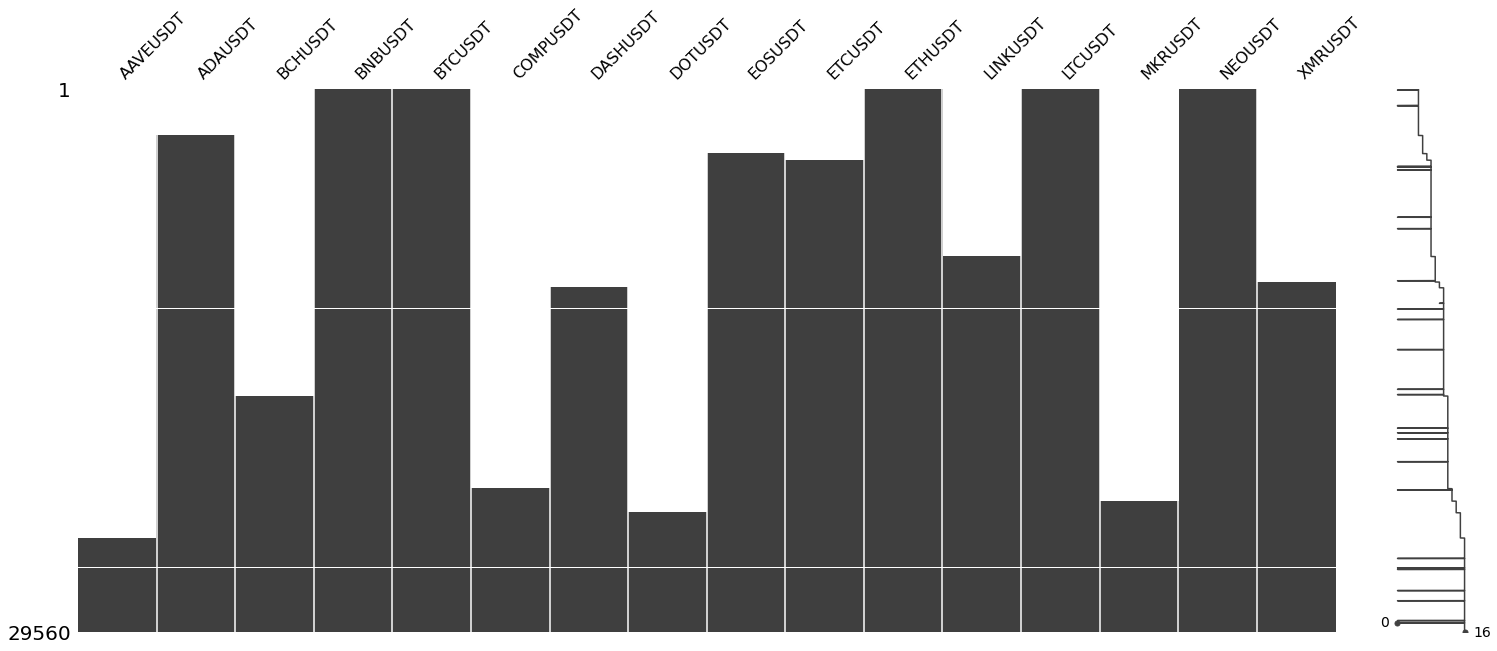

In [ ]:
msno.matrix(close_criptos) #Missingo cuando hay tantas columnas elige no mostrarlas

Text(0.5, 1.0, 'ETHUSDT')

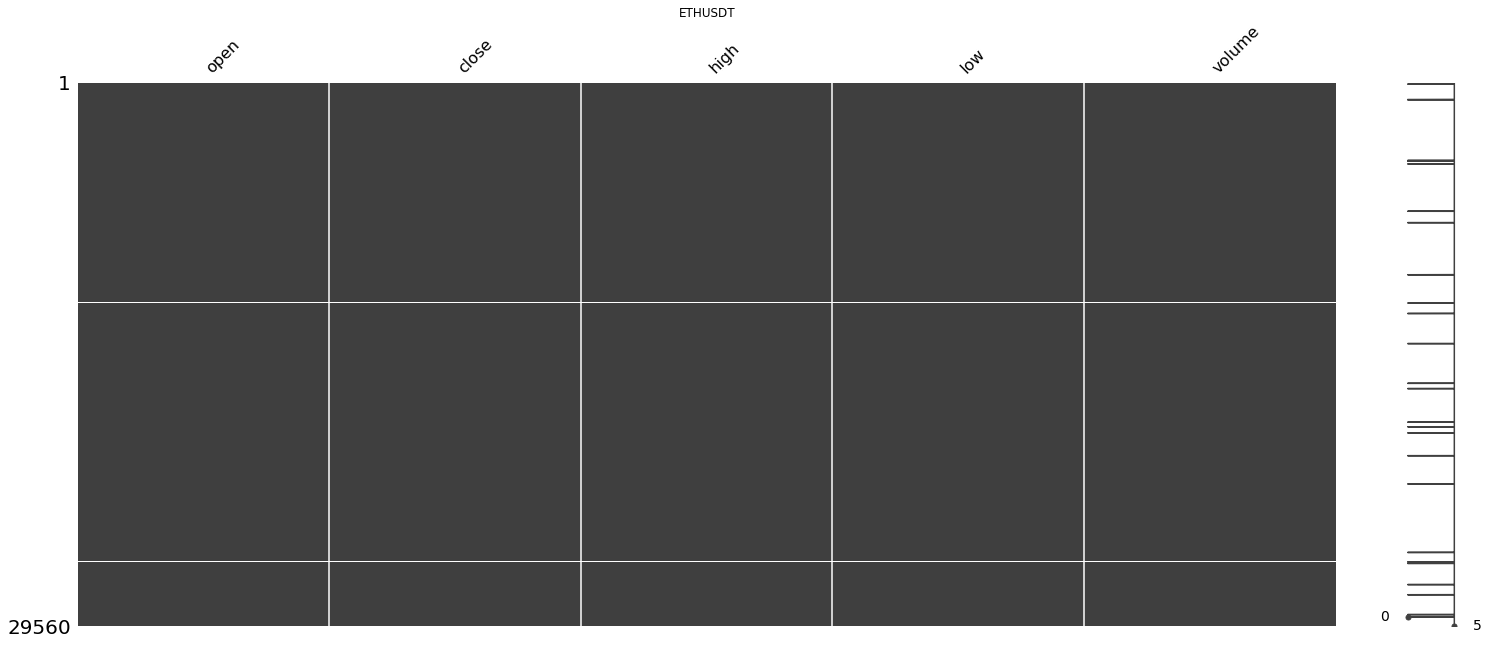

In [ ]:
msno.matrix(cryptos['ETHUSDT'])
plt.title('ETHUSDT')

In [ ]:
# NaN por mes para ETH
ETHUSDT = cryptos['ETHUSDT']
ETH_fvi = cryptos['ETHUSDT'].first_valid_index()
ETHUSDT = ETHUSDT.loc[ETH_fvi:]
ETHUSDT_nan = pd.DataFrame(data={'YMDH': ETHUSDT[ETHUSDT.close.isna()].index,
                                 'YMD': ETHUSDT[ETHUSDT.close.isna()].index.strftime('%Y-%m')})
ETHUSDT_nan.groupby('YMD').agg(ETHUSDT_NaN=('YMDH','count')).T

YMD,2018-01,2018-02,2018-06,2018-07,2018-10,2018-11,2019-03,2019-05,2019-06,2019-08,2019-11,2020-02,2020-03,2020-04,2020-06,2020-11,2020-12,2021-02,2021-03,2021-04
ETHUSDT_NaN,1,32,11,7,3,7,6,10,1,8,4,6,1,2,3,1,5,2,1,5


Observando toda la información previa, concluimos que siempre que falta información, la ausencia de la misma se da en paralelo para todos los activos (siempre y cuando ya exista la serie temporal para esa fecha/hora) y de igual manera para todas las variables. Asimismo, los periodos de información faltante son en general breves (menos de 12hs), motivo por el cual nos parece adecuado utilizar backwards fill (rellenando con el valor siguiente). Para algunas criptos existen periodos de más de 12 horas sin datos, pero fue en el comienzo de las series de tiempo, periodos de gran estabilidad en los valores, por lo que consideramos correcto en este caso utilizar la misma metodología. 

Los motivos por los que pueden faltar datos son diversos:
- La plataforma desde la cual la API obtiene los datos estuvo caída y no registro los valores durante ese período.
- La API utilizada para generar la base de datos tuvo problemas en el momento de la consulta.
- Efectivamente el faltante de datos se debe a problemas en la red sobre la cual funciona el activo para esas fechas/horas (en este caso esto es improbable ya que se da en simultáneo para varios activos y están descentralizadas)

Dado que siempre que faltan datos, sucede en todas las cryptos en simultaneo, podemos descartar el último motivo enumerado arriba. A su vez, no contamos con la información para definir cúal fue el motivo exacto.

Con respecto a la definición de dato perdido o dato inexistente, creemos que correspondería decir que estos datos son perdidos, porque no hubo apagones en la red de los activos (además que de que funcionan en distintas blockchains), y por ende era posible seguir comerciandondolos. 

In [ ]:
# plt.subplots(figsize=(25,15))
# ax = sns.heatmap(data=close_criptos.isna(), cmap='viridis', cbar=False)
# plt.title('Fig 1: Valores faltantes (en amarillo) para cada criptoactivo', fontsize=16, pad=20)
# ax.axes.get_yaxis().set_visible(False)
# ax.tick_params(labelsize=15)

In [ ]:
for i in close_criptos.columns:
    first_date = close_criptos[i].first_valid_index()
    open_criptos[i] = open_criptos[[i]].query('index >= @first_date').fillna(method='bfill', limit=36)
    high_criptos[i] = high_criptos[[i]].query('index >= @first_date').fillna(method='bfill', limit=36)
    low_criptos[i] = low_criptos[[i]].query('index >= @first_date').fillna(method='bfill', limit=36)
    close_criptos[i] = close_criptos[[i]].query('index >= @first_date').fillna(method='bfill', limit=36)
    volume_criptos[i] = volume_criptos[[i]].query('index >= @first_date').fillna(method='bfill', limit=36)
    empty_rows = close_criptos[[i]].query('index >= @first_date').isna().sum()[0]
    total_rows = len(close_criptos[[i]].query('index >= @first_date'))
    print('Para la crypto '+str(i)+' hay '+str(empty_rows)+' filas sin datos sobre un total de '+ str(total_rows))
#close_criptos.fillna(method='bfill', limit=12).isna().sum()

Para la crypto AAVEUSDT hay 0 filas sin datos sobre un total de 5125
Para la crypto ADAUSDT hay 0 filas sin datos sobre un total de 27012
Para la crypto BCHUSDT hay 0 filas sin datos sobre un total de 12846
Para la crypto BNBUSDT hay 0 filas sin datos sobre un total de 29560
Para la crypto BTCUSDT hay 0 filas sin datos sobre un total de 29560
Para la crypto COMPUSDT hay 0 filas sin datos sobre un total de 7810
Para la crypto DASHUSDT hay 0 filas sin datos sobre un total de 18732
Para la crypto DOTUSDT hay 0 filas sin datos sobre un total de 6497
Para la crypto EOSUSDT hay 0 filas sin datos sobre un total de 26027
Para la crypto ETCUSDT hay 0 filas sin datos sobre un total de 25670
Para la crypto ETHUSDT hay 0 filas sin datos sobre un total de 29560
Para la crypto LINKUSDT hay 0 filas sin datos sobre un total de 20430
Para la crypto LTCUSDT hay 0 filas sin datos sobre un total de 29560
Para la crypto MKRUSDT hay 0 filas sin datos sobre un total de 7130
Para la crypto NEOUSDT hay 0 filas

## 1.2

In [ ]:
close_criptos.index.duplicated(keep=False).sum()

0

**No encontramos que haya índices repetidos en la fuente de datos.** En caso de que los hubiera, al ser una serie de tiempo no corresponde que esto suceda, por lo que tendríamos que eliminar alguno o combinarlos de alguna forma (dependiendo del contenido de las filas con índices duplicados, se puede elegir la agregación más conveniente).

## 1.3

Se podrían establecer dos grupos de criptos analizando principalmente el market capital, la fecha más antigua para la cual contamos con información y una fecha de quiebre (noviembre 2019), en donde a partir de los primeros indicios de la pandemia, el universo cripto tomó una nueva relevancia.
- El primer grupo incluye: *BNBUSDT, BTCUSDT, ETHCUSDT, NEOUSDT, ADAUSDT, LTCUSDT*
- El segundo grupo incluye: *AAVEUSDT, BCHUSDT, COMPUSDT, DASHUSDT, DOTUSDT, EOSUSDT, ETCUSDT, LINKUSDT, MKRUSDT, XMRUSDT*.

In [ ]:
open_criptos_g1 = open_criptos[['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'NEOUSDT', 'ADAUSDT', 'LTCUSDT']]
open_criptos_g2 = open_criptos[['AAVEUSDT', 'BCHUSDT', 'COMPUSDT', 'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'LINKUSDT', 'MKRUSDT', 'XMRUSDT']]
high_criptos_g1 = high_criptos[['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'NEOUSDT', 'ADAUSDT', 'LTCUSDT']]
high_criptos_g2 = high_criptos[['AAVEUSDT', 'BCHUSDT', 'COMPUSDT', 'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'LINKUSDT', 'MKRUSDT', 'XMRUSDT']]
low_criptos_g1 = low_criptos[['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'NEOUSDT', 'ADAUSDT', 'LTCUSDT']]
low_criptos_g2 = low_criptos[['AAVEUSDT', 'BCHUSDT', 'COMPUSDT', 'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'LINKUSDT', 'MKRUSDT', 'XMRUSDT']]
close_criptos_g1 = close_criptos[['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'NEOUSDT', 'ADAUSDT', 'LTCUSDT']]
close_criptos_g2 = close_criptos[['AAVEUSDT', 'BCHUSDT', 'COMPUSDT', 'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'LINKUSDT', 'MKRUSDT', 'XMRUSDT']]
volume_criptos_g1 = volume_criptos[['BNBUSDT', 'BTCUSDT', 'ETHUSDT', 'NEOUSDT', 'ADAUSDT', 'LTCUSDT']]
volume_criptos_g2 = volume_criptos[['AAVEUSDT', 'BCHUSDT', 'COMPUSDT', 'DASHUSDT', 'DOTUSDT', 'EOSUSDT', 'ETCUSDT', 'LINKUSDT', 'MKRUSDT', 'XMRUSDT']]

## 1.5

ADAUSDT

In [ ]:
ADAUSDT_idx = close_criptos['ADAUSDT'].first_valid_index()
ADAUSDT = close_criptos[close_criptos.index >= ADAUSDT_idx]['ADAUSDT']

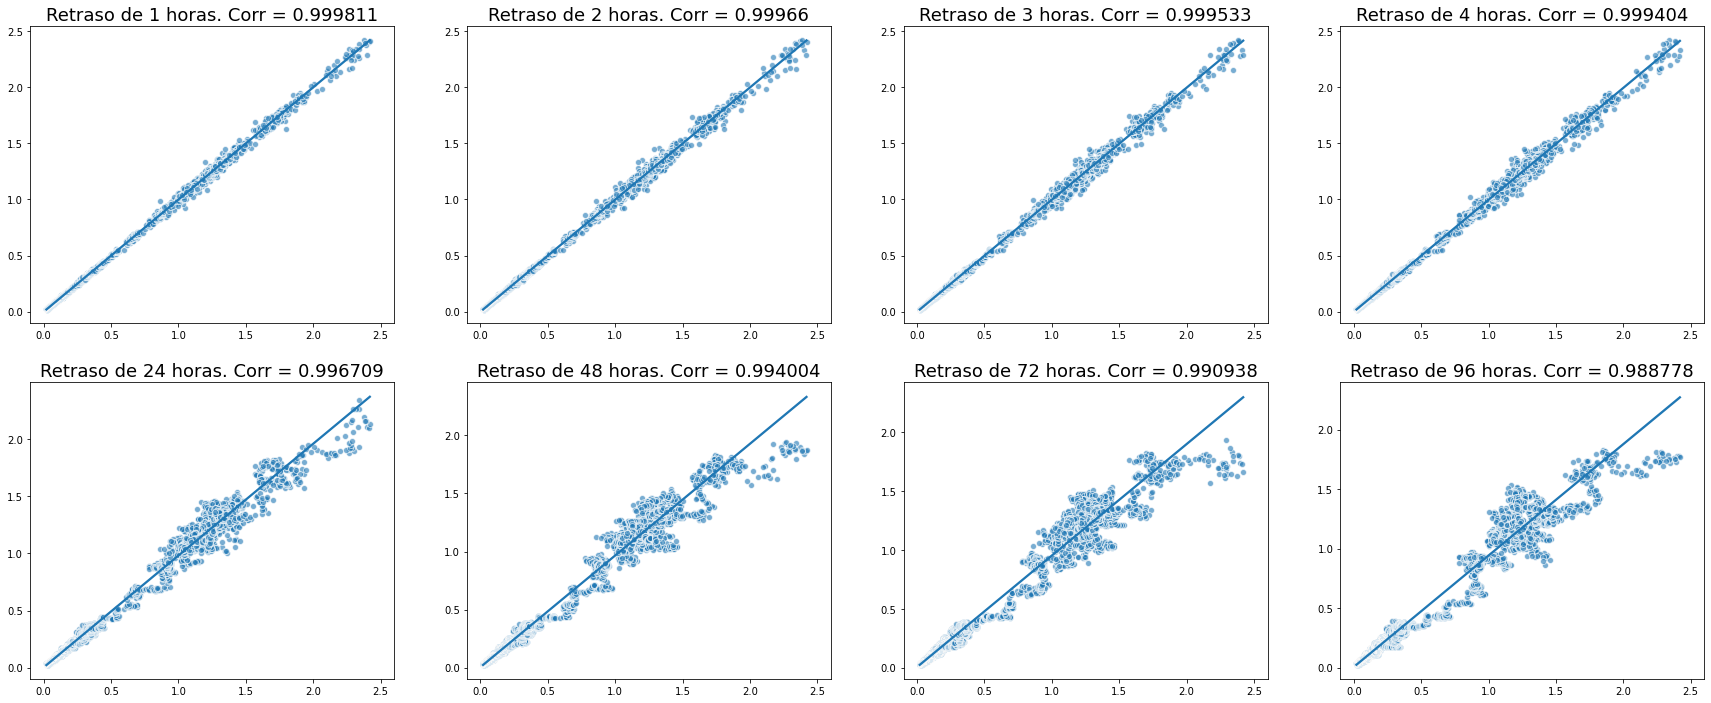

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(30,12))
axes = np.ravel(axes)
#plt.title('Scatterplots para ADAUSDT CLOSE y su versión retrasada {1-4} horas', fontsize=20)#, pad=30)
ADAUSDT_corrs = dict()

for i,h in enumerate([1,2,3,4,24,48,72,96]):
    sns.regplot(x=ADAUSDT.values, y=ADAUSDT.shift(h).values, ax=axes[i], fit_reg=True, scatter_kws={'alpha':0.6, 'edgecolors' : 'w'})
    ADAUSDT_corrs[h] = ADAUSDT.corr(ADAUSDT.shift(h))
    axes[i].set_title(f'Retraso de {h} horas. Corr = {round(ADAUSDT_corrs[h],6)}', fontsize=18)
    axes[i].set_xlim(-0.1, 2.6)

#fig.tight_layout()

Para este criptoactivo y estos intervalos de tiempo en particular, la correlación es llamativamente alta. Visualizando adicionalmente los scatterplots observados y la regresión, que habría una relación lineal entre la serie y su versión retrasada _n_ horas en el tiempo.

In [ ]:
# test = pd.DataFrame(index=cryptos['BTCUSDT'].index)
# for i,h in enumerate(list(range(0,7224,24))):
#     test[h] = ADAUSDT.shift(h)

# fig, axes = plt.subplots(figsize=(18,18))
# sns.heatmap(test.corr(),)# cmap="YlGnBu")

## 1.6

**ACF**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#import statsmodels

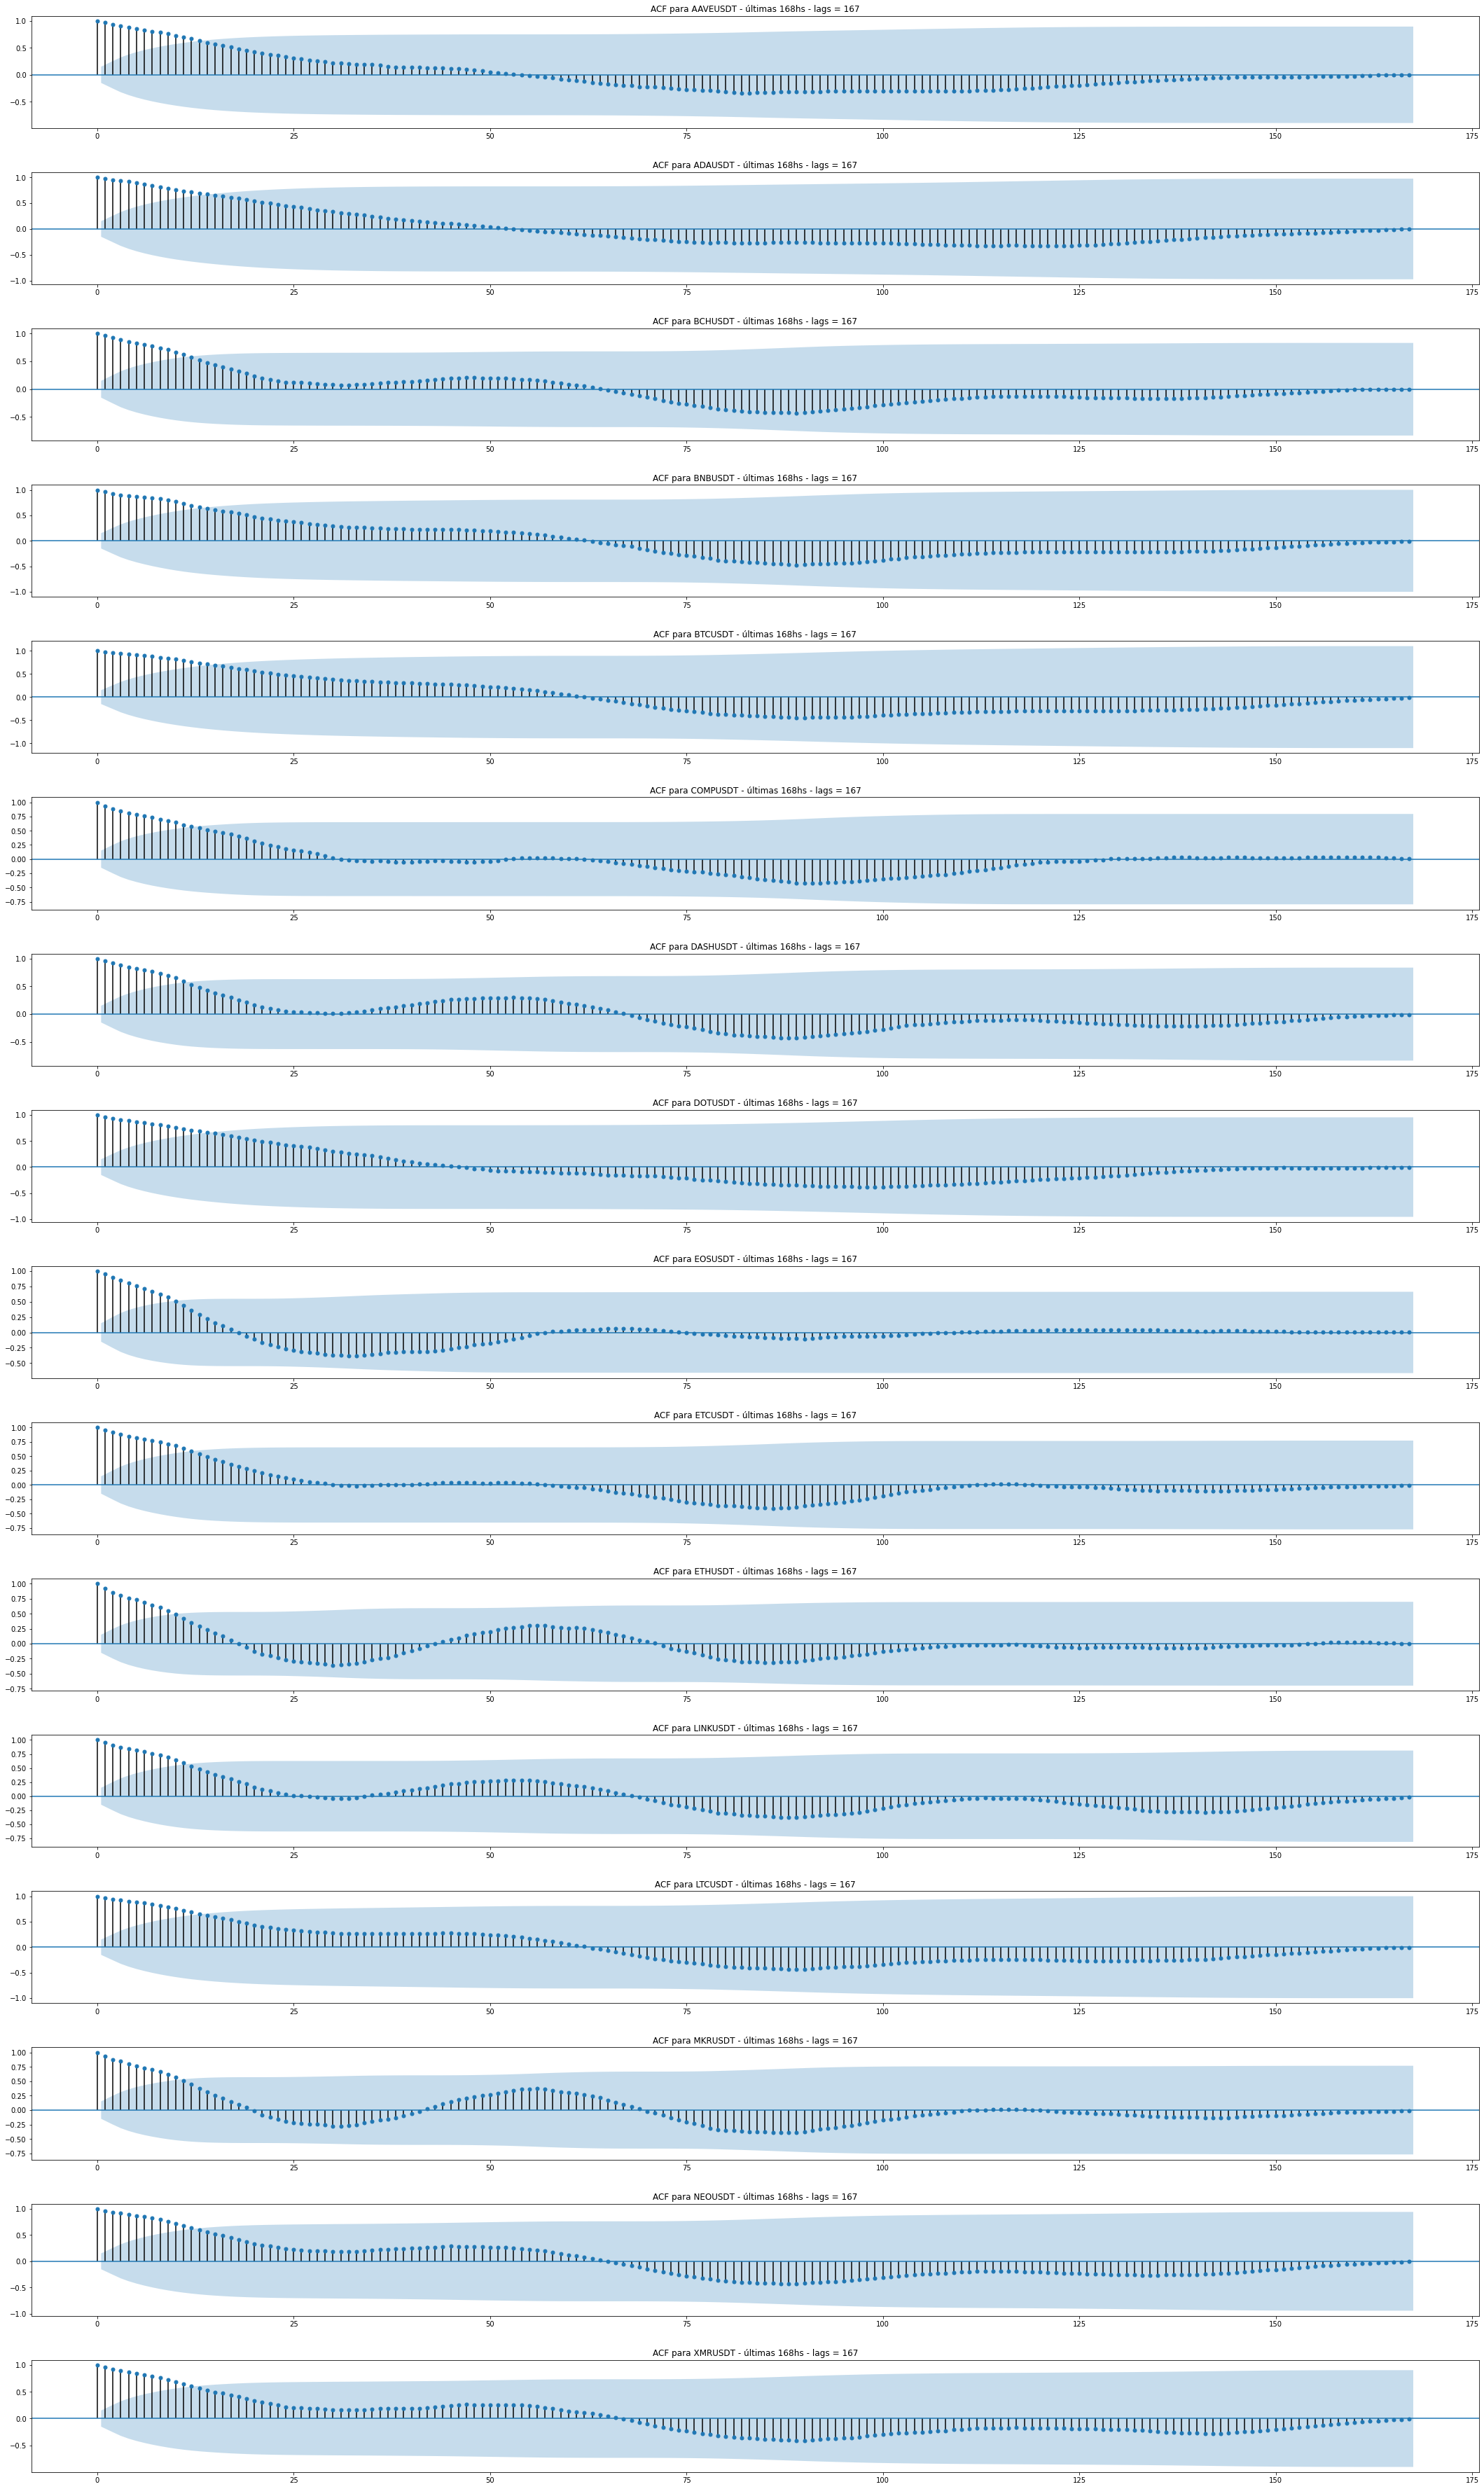

In [ ]:
fig, axes = plt.subplots(16,1, figsize=(30,50))
for p, i in enumerate(close_criptos.columns):
    cr_idx = close_criptos[i].first_valid_index()
    cr = close_criptos[close_criptos.index >= cr_idx][i]
    cr = cr.last('168h')
    plot_acf(cr, lags=168-1, ax=axes[p], fft=True, title=f'ACF para {i} - últimas 168hs - lags = 167');
fig.tight_layout(pad=3.0)


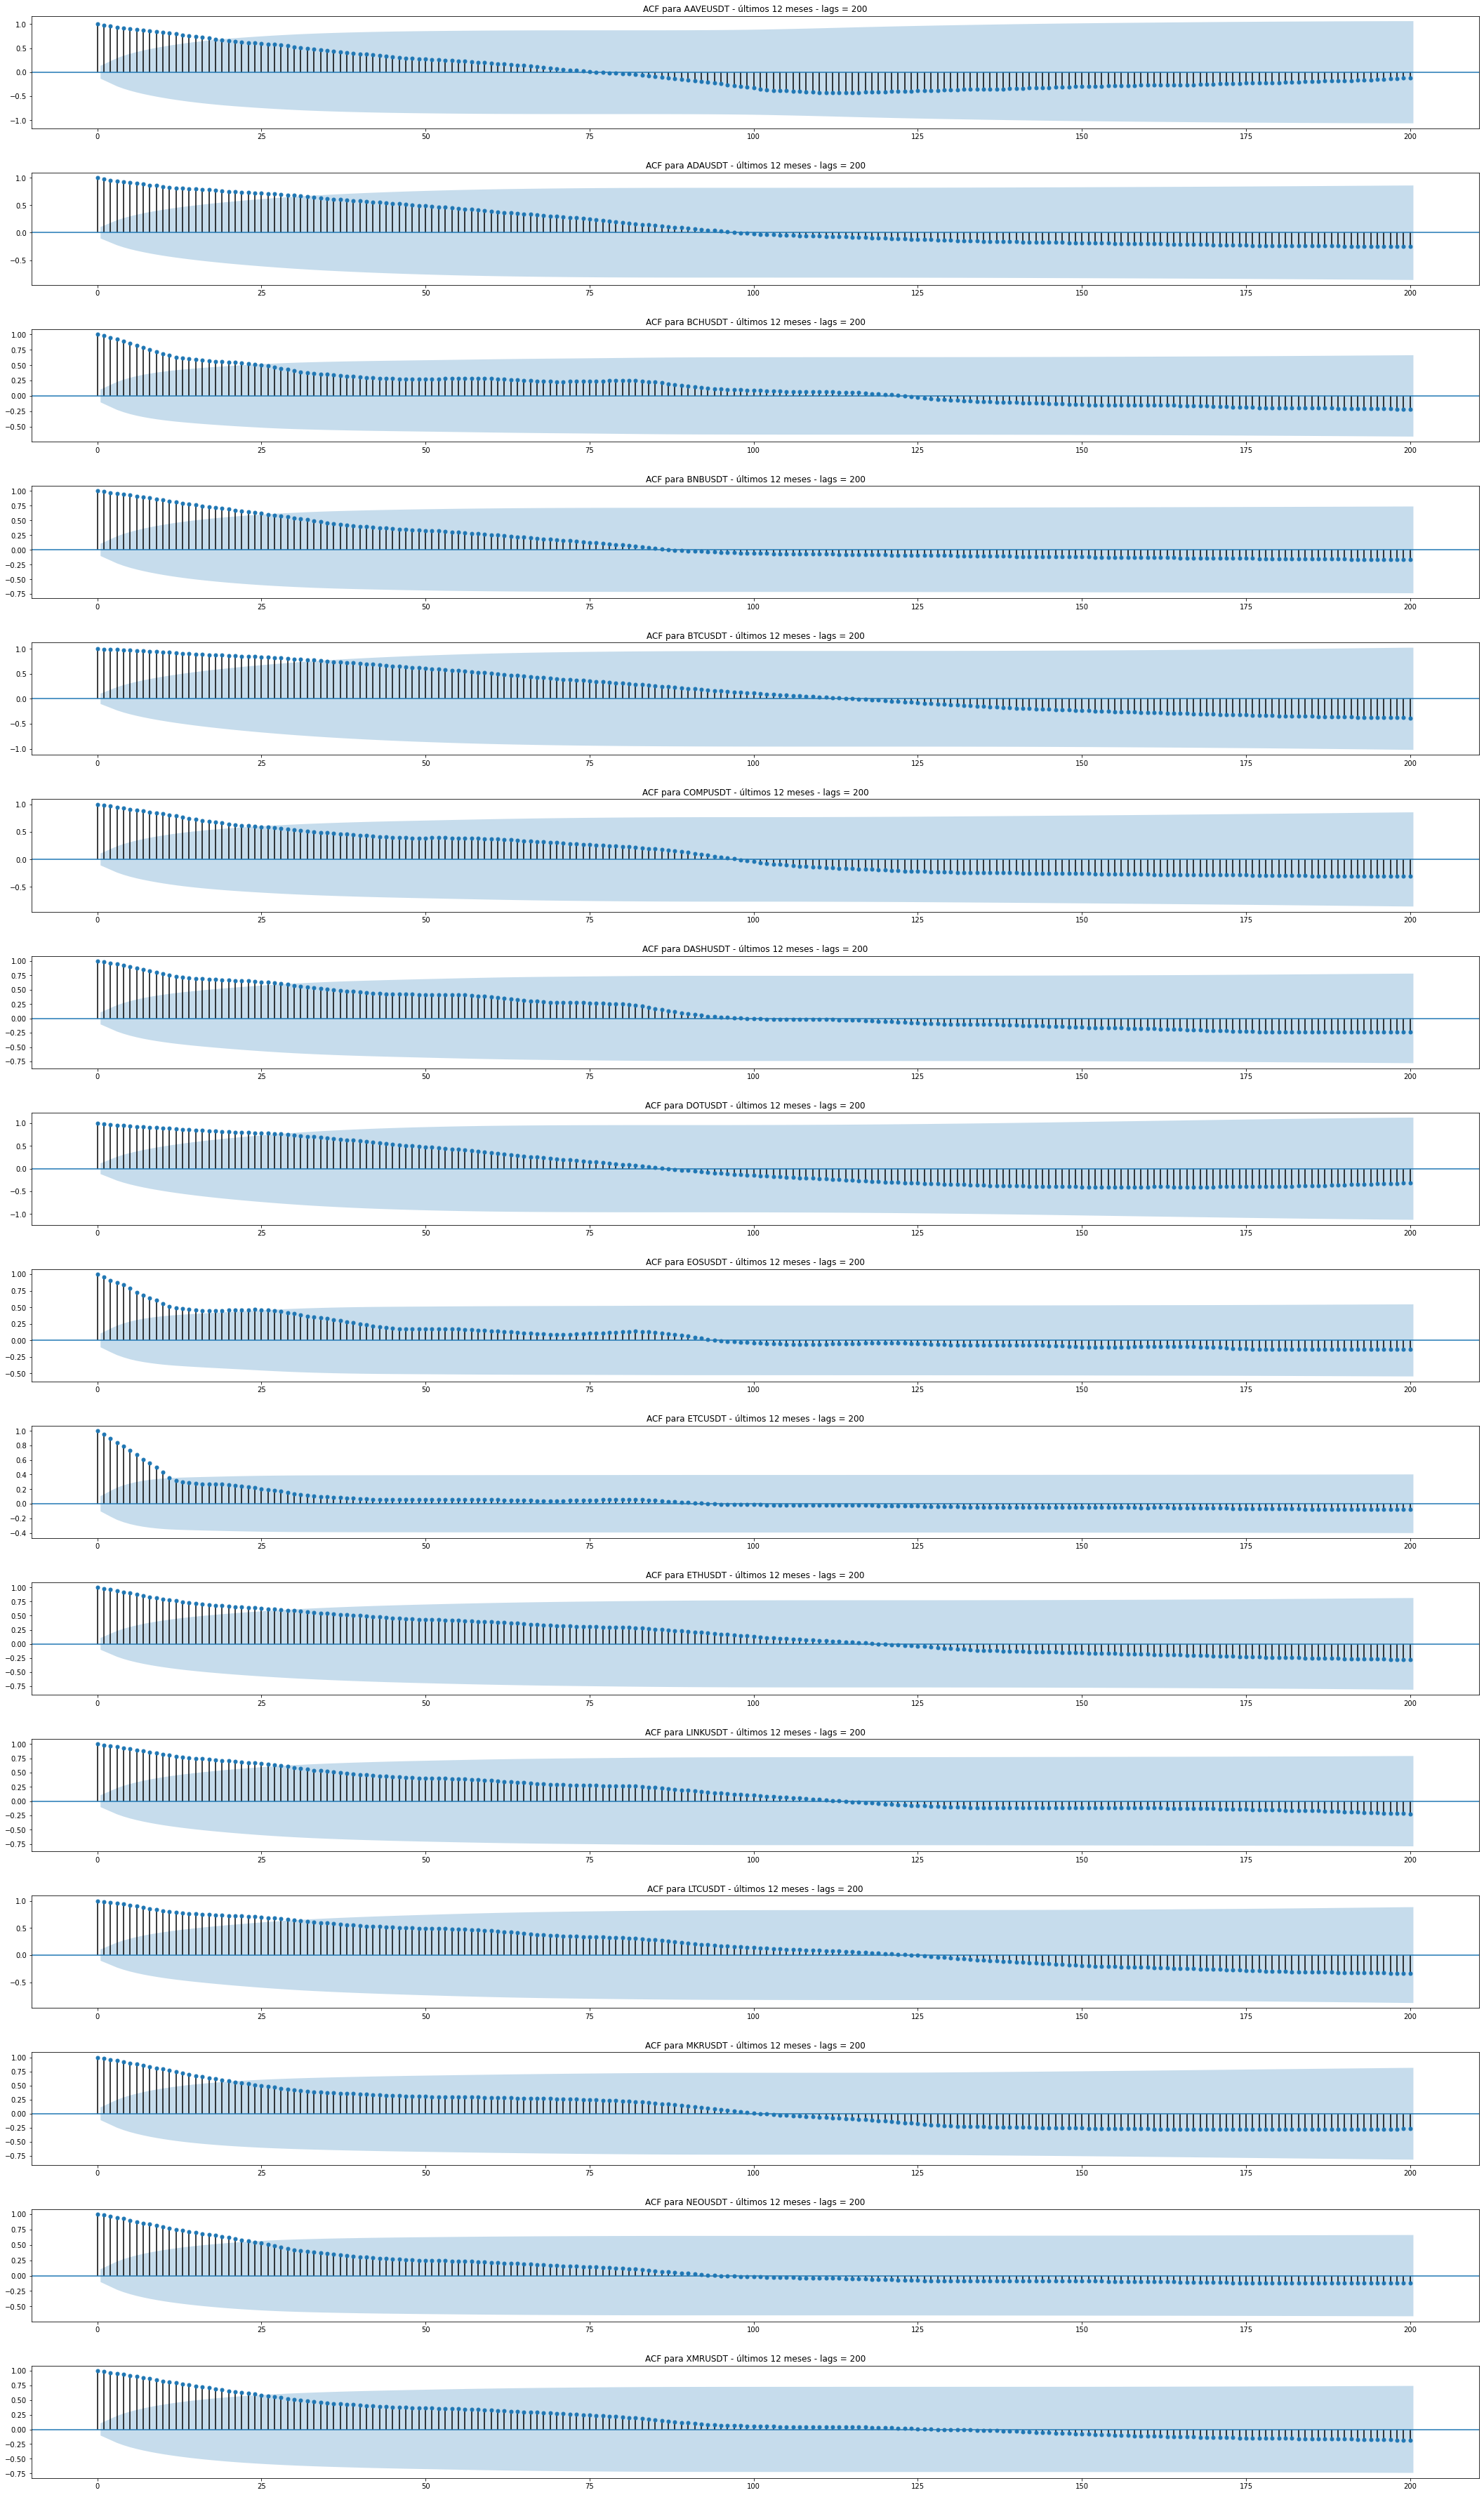

In [ ]:
fig, axes = plt.subplots(16,1, figsize=(30,50))
for p, i in enumerate(close_criptos.columns):
    cr_idx = close_criptos[i].first_valid_index()
    cr = close_criptos[close_criptos.index >= cr_idx][i]
    cr = cr.last('12M').resample('D').max()
    plot_acf(cr, lags=200, ax=axes[p], fft=True, title=f'ACF para {i} - últimos 12 meses - lags = 200');
fig.tight_layout(pad=3.0)


La autocorrelación (AC) describe la relación entre una observación en el tiempo `i` y su versión `K` unidades de tiempo antes, incluyendo tanto el efecto de la observación en `K `, como de todas las observaciones intermedias. En este caso ploteamos los precios de cierre para un lag de 168hs y de 200 días. Para el primer caso, analizando en unidad de tiempo horas (corto placista), se puede observar que a grandes rasgos, la correlación es positiva y significativa para unas 12hs de lag. Luego ya se sale de la zona del intervalo de confianza, la correlación oscila, se reduce y por momentos se torna negativa (hay variaciones dependiendo del criptoactivo). Para el caso de evaluación en días, se puede observar como la AC decae a medida que aumenta la cantidad de días y en general en todas las criptos, su precio de cierre se encuentra influenciado por los 15 días previos. Estas conclusiones puede sernos de utilidad a la hora de decidir distintas agregaciones y resampleos, generar features, etc. 

**PACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


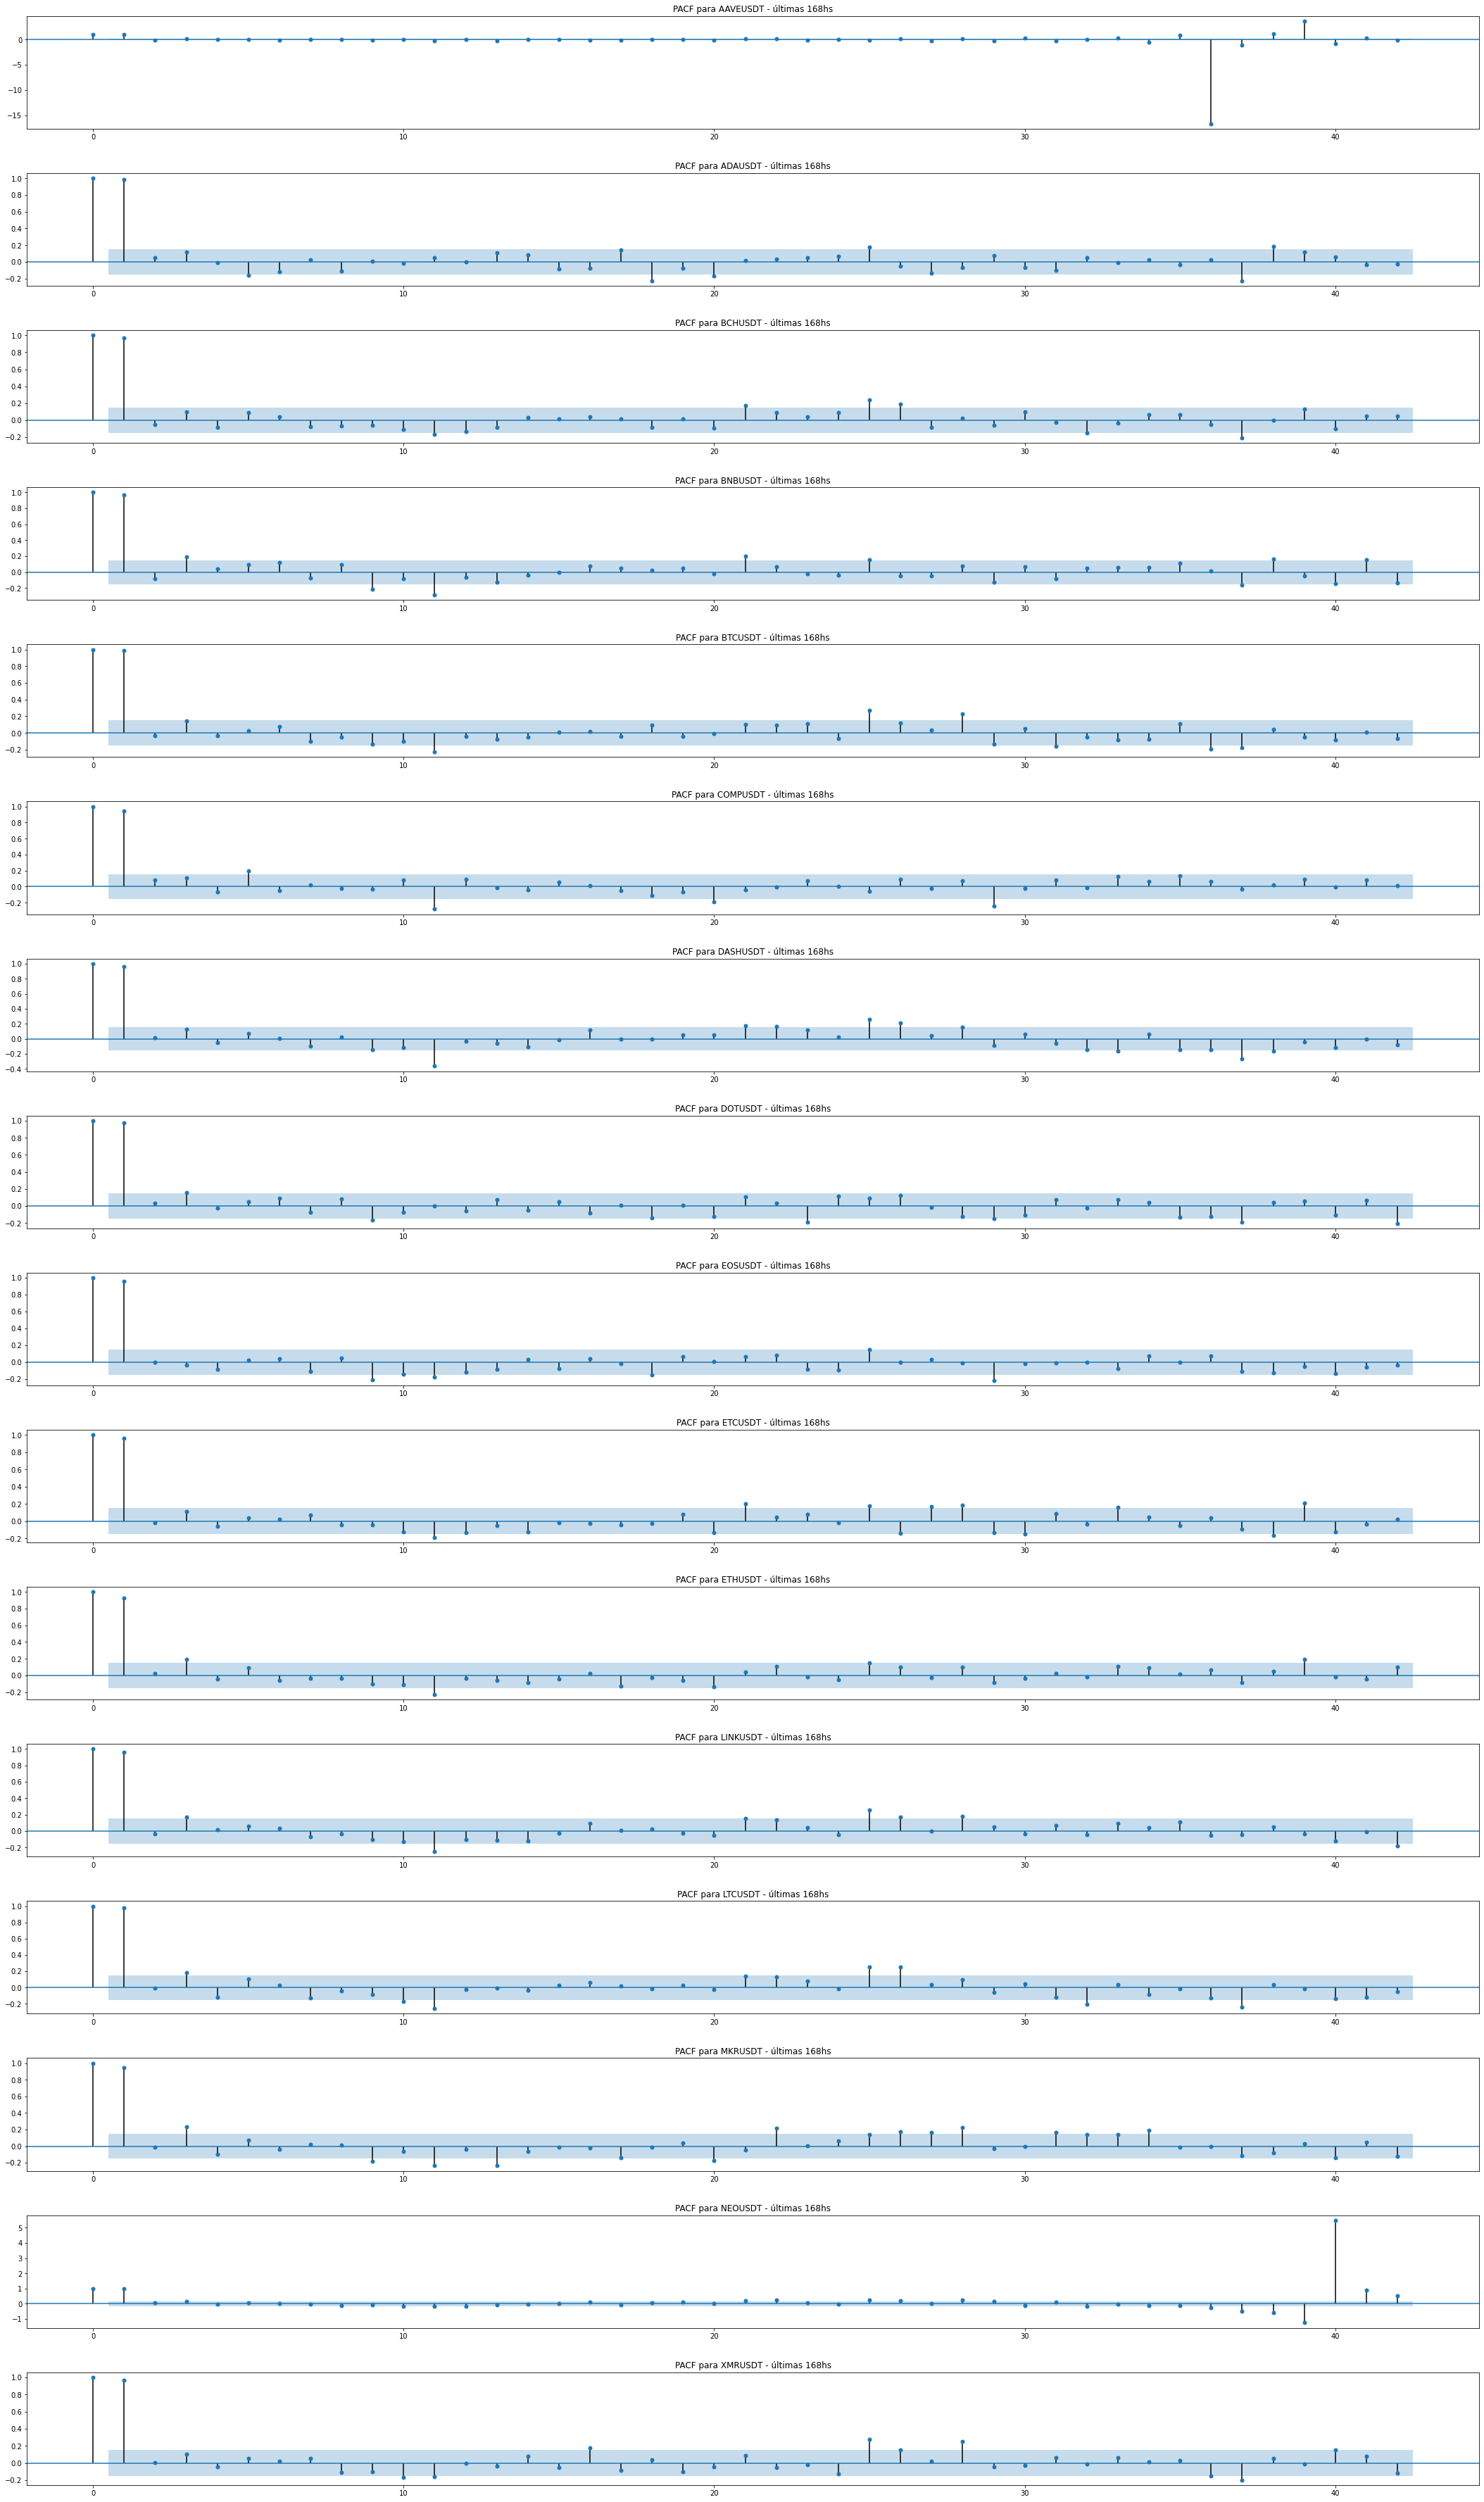

In [ ]:
fig, axes = plt.subplots(16,1, figsize=(30,50))
for p, i in enumerate(close_criptos.columns):
    cr_idx = close_criptos[i].first_valid_index()
    cr = close_criptos[close_criptos.index >= cr_idx][i]
    cr = cr.last('168h')
    plot_pacf(cr, lags=168/4, ax=axes[p], title=f'PACF para {i} - últimas 168hs');
fig.tight_layout(pad=3.0)

Para el cálculo de la autocorrelación parcial, donde la observación solo se ve influenciada por la observación K unidades de tiempo antes, cada cripto tiene sus particularidades. Es necesario mencionar que los valores en muchos casos son mayores o menos a 1. No está claro por qué el algoritmo devuelve estos valores. Asumiendo que son correctos, hay casos de correlaciones altamente positivas y negativas con varias horas (caso de AAVEUSDT en ~130hs) y muchos episodios de correlaciones altas para ciertas horas particulares (DOTUSDT en ~90hs). Si se analiza en términos de días, en general se observa que los 100 días anteriores, no afectan demasiado al precio, pero que más atrás en el tiempo, sí se ve afectado el precio tanto positiva como negativamente (DOTUSDT, BCHUSDT, BNBUSDT ~150días).

# Parte 2

## 2.1

In [ ]:
df_full_pct = df_full.pct_change()
df_full_pct.columns = [f'{i}_pct' for i in df_full_pct.columns]
# solo cierre
#close_cols = [i for i in df_full_pct.columns if 'close' in i]
#df_close_pct = df_full_pct.loc[:, close_cols]

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3709    0  3709    0     0  36009      0 --:--:-- --:--:-- --:--:-- 36009
100  503k  100  503k    0     0  1803k      0 --:--:-- --:--:-- --:--:-- 1803k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3673    0  3673    0     0  41269      0 --:--:-- --:--:-- --:--:-- 41269
100  406k  100  406k    0     0  1831k      0 --:--:-- --:--:-- --:--:-- 1831k


In [ ]:
return_rates = pd.DataFrame(index=close_criptos.index)

for i in close_criptos.columns:
  return_rates[i] = (close_criptos[i] / close_criptos[i].shift(1))-1

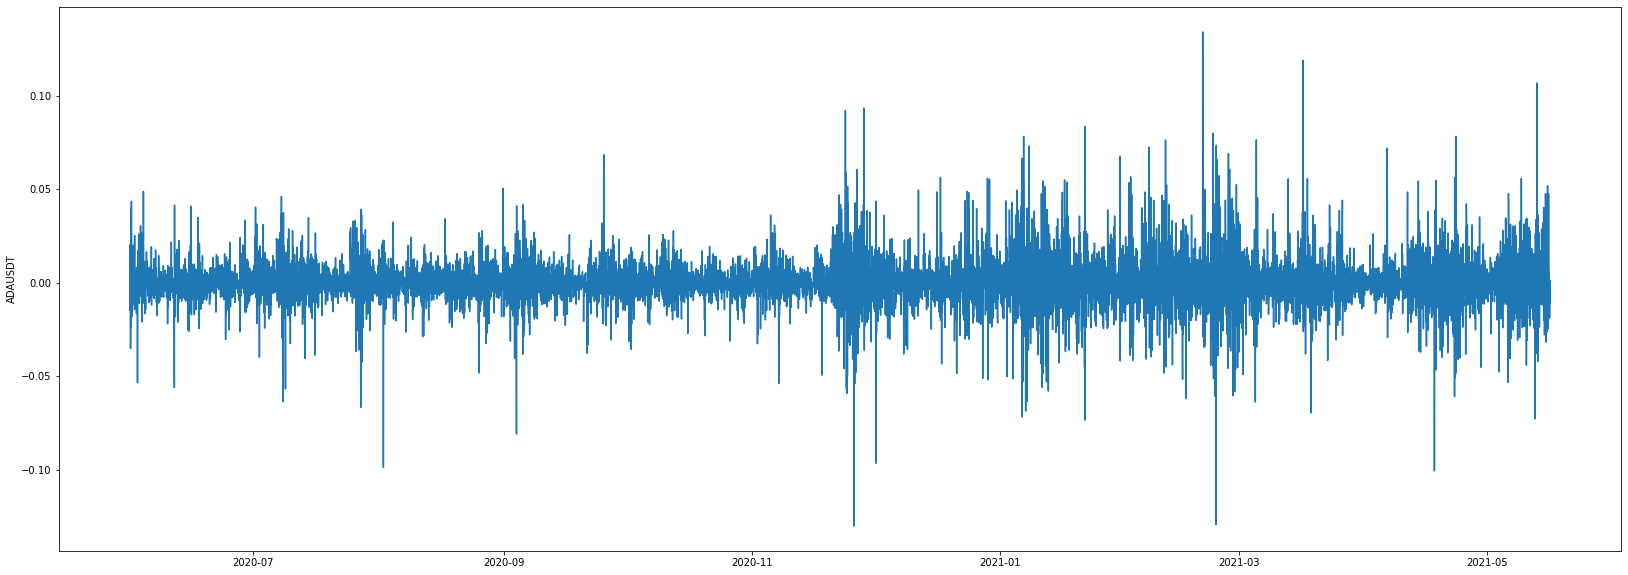

In [ ]:
plt.subplots(figsize=(28,10))
sns.lineplot(data=return_rates.ADAUSDT.last('12M'))

In [ ]:
# df_full_pct = df_full.pct_change()
# df_full_pct.columns = [f'{i}_pct' for i in df_full_pct.columns]
# df_full_pct

## 2.2

In [ ]:
# MA para df_full
df_full_MA_24 = df_full.rolling(window=24).mean()
df_full_MA_24.columns = [f'{i}_MA_24' for i in df_full_MA_24.columns]
df_full_MA_1w = df_full.rolling(window=24*7).mean()
df_full_MA_1w.columns = [f'{i}_MA_1w' for i in df_full_MA_1w.columns]

In [ ]:
# MA close
moving_average_day = pd.DataFrame(index=close_criptos.index)
moving_average_week = pd.DataFrame(index=close_criptos.index)

for i in close_criptos.columns:
  moving_average_day[i] = close_criptos[i].rolling(window=24).mean()
  moving_average_week[i] = close_criptos[i].rolling(window=24*7).mean()


Text(0.5, 1.0, 'Ventana temporal 7 dias')

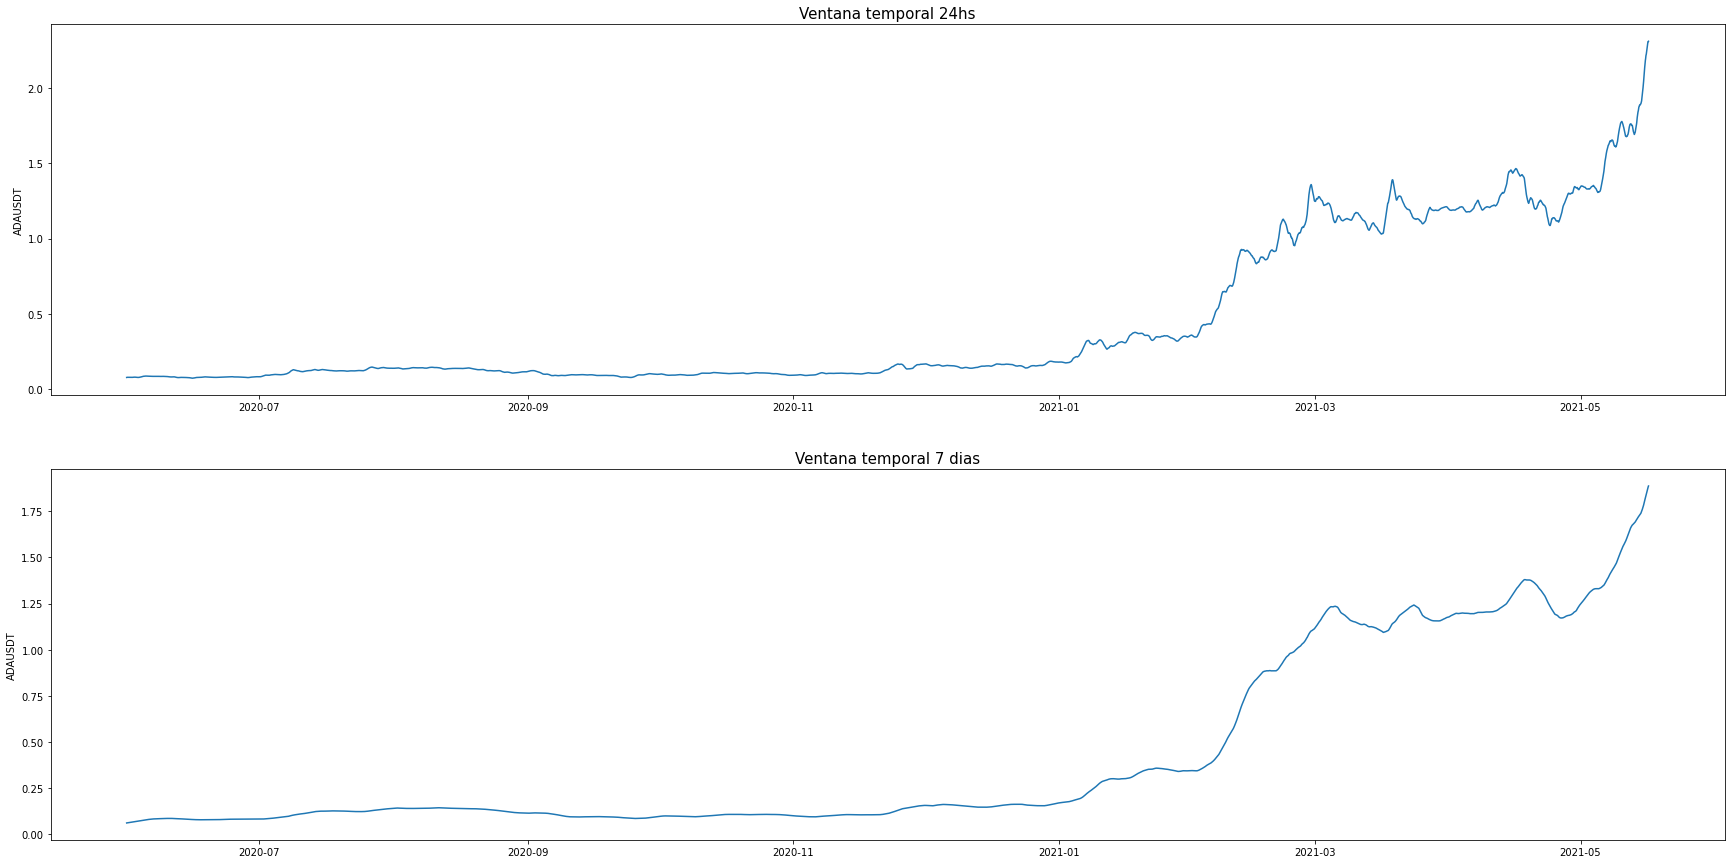

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(30,15))
plt.title('Media movil para los últimos 12 meses de ADAUSDT', fontsize=20, pad=30)
sns.lineplot(data=moving_average_day.ADAUSDT.last('12M'), ax=axes[0])
sns.lineplot(data=moving_average_week.ADAUSDT.last('12M'), ax=axes[1])
axes[0].set_title('Ventana temporal 24hs', fontsize=15)
axes[1].set_title('Ventana temporal 7 dias', fontsize=15)

Pero en realidad queremos saber si el valor estuvo por arriba o debajo de la MA

In [ ]:
for i in close_criptos.columns:
    moving_average_day[i] = np.where(close_criptos[i] > close_criptos[i].rolling(window=24).mean(), 1, -1) 
    moving_average_week[i] = np.where(close_criptos[i] > close_criptos[i].rolling(window=24*7).mean(), 1, -1) 

## 2.3

Tomamos a Cardano (ADA) como ejemplo para mostrar los distintos indicadores técnicos que calculamos. 

- En el caso del RSI, en algunos momentos toca la sobre compra (valores superiores a 70) y la sobre venta (valores inferiores a 30)
- El EMA muestra un continuo aumento de precios a partir de enero de 2021
- El ADX detectó fuertes tendencias de movimiento en septiembre de 2020 y febrero de 2021.

En todos los indicadores cuando se calculan con una ventana temporal de 24hs hay una fuerte volatilidad, que se reduce al ampliarse a 7 días (aunque se mantiene elevada).



In [ ]:
RSI_day = pd.DataFrame(index=close_criptos.index)
RSI_week = pd.DataFrame(index=close_criptos.index)

for i in close_criptos.columns:
  RSI_day[i] = talib.RSI(close_criptos[i], timeperiod=24)
  RSI_week[i] = talib.RSI(close_criptos[i], timeperiod=24*7)

In [ ]:
RSI_day.columns = [f'{i}_RSI_24' for i in RSI_day.columns]
RSI_week.columns = [f'{i}_RSI_1w' for i in RSI_week.columns]

In [ ]:
RSI_week

,AAVEUSDT_RSI_1w,ADAUSDT_RSI_1w,BCHUSDT_RSI_1w,BNBUSDT_RSI_1w,BTCUSDT_RSI_1w,COMPUSDT_RSI_1w,DASHUSDT_RSI_1w,DOTUSDT_RSI_1w,EOSUSDT_RSI_1w,ETCUSDT_RSI_1w,ETHUSDT_RSI_1w,LINKUSDT_RSI_1w,LTCUSDT_RSI_1w,MKRUSDT_RSI_1w,NEOUSDT_RSI_1w,XMRUSDT_RSI_1w
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16 11:00:00,51.916467,57.495630,49.943061,49.272695,46.334648,48.870475,49.492682,52.707407,51.281582,51.189701,51.040634,49.475414,49.445298,49.297330,49.026763,48.666175
2021-05-16 12:00:00,51.360471,56.895008,49.624804,48.850896,46.047558,48.475853,49.174737,52.260456,50.963379,50.799424,50.411109,49.135545,49.092071,49.021352,48.666320,48.381887
2021-05-16 13:00:00,51.483568,56.922230,49.871228,48.978831,46.297612,48.481630,49.373938,52.492114,51.113072,50.923792,50.564119,49.216273,49.244055,49.040925,48.876427,48.638684
2021-05-16 14:00:00,50.952064,56.631729,49.413259,48.454175,45.837234,48.307578,48.922106,51.927804,50.741321,50.720446,50.178451,48.823796,48.834090,48.856051,48.562299,48.356529


Text(0.5, 1.0, 'Ventana temporal 7 dias')

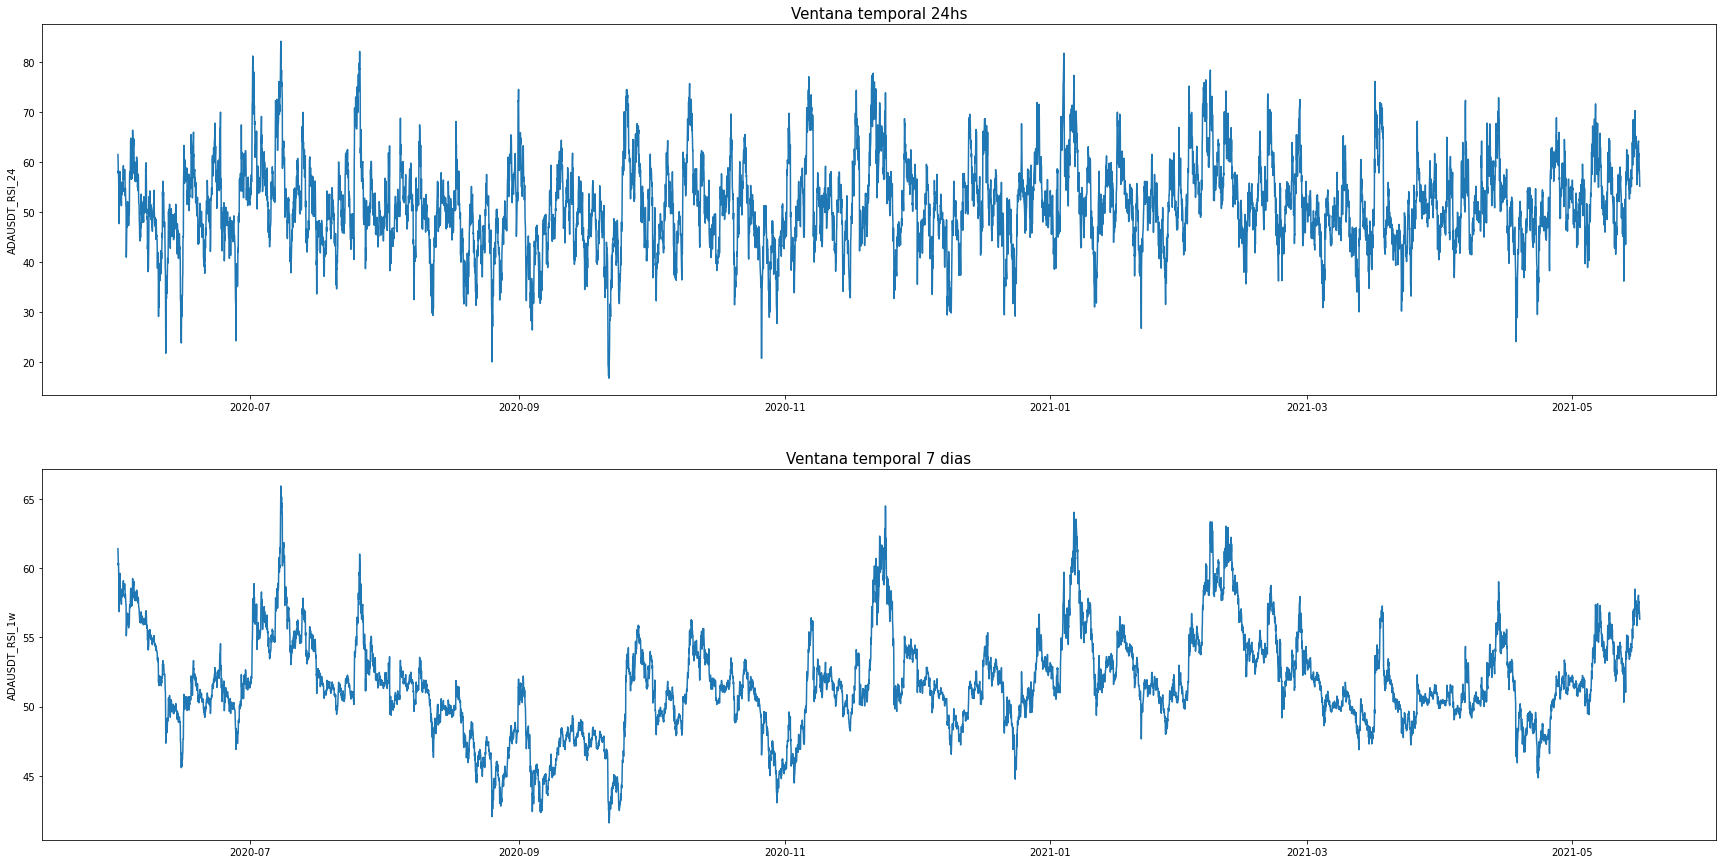

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(30,15))
plt.title('RSI para los últimos 12 meses de ADAUSDT', fontsize=20, pad=30)
sns.lineplot(data=RSI_day.ADAUSDT_RSI_24.last('12M'), ax=axes[0])
sns.lineplot(data=RSI_week.ADAUSDT_RSI_1w.last('12M'), ax=axes[1])
axes[0].set_title(and Ventana temporal 24hs', fontsize=15)
axes[1].set_title('Ventana temporal 7 dias', fontsize=15)

In [ ]:
EMA_day = pd.DataFrame(index=close_criptos.index)
EMA_week = pd.DataFrame(index=close_criptos.index)

for i in close_criptos.columns:
  EMA_day[i] = talib.EMA(close_criptos[i], timeperiod=24)
  EMA_week[i] = talib.EMA(close_criptos[i], timeperiod=24*7)

In [ ]:
EMA_day.columns = [f'{i}_EMA_24' for i in EMA_day.columns]
EMA_week.columns = [f'{i}_EMA_1w' for i in EMA_week.columns]

Text(0.5, 1.0, 'Ventana temporal 7 dias')

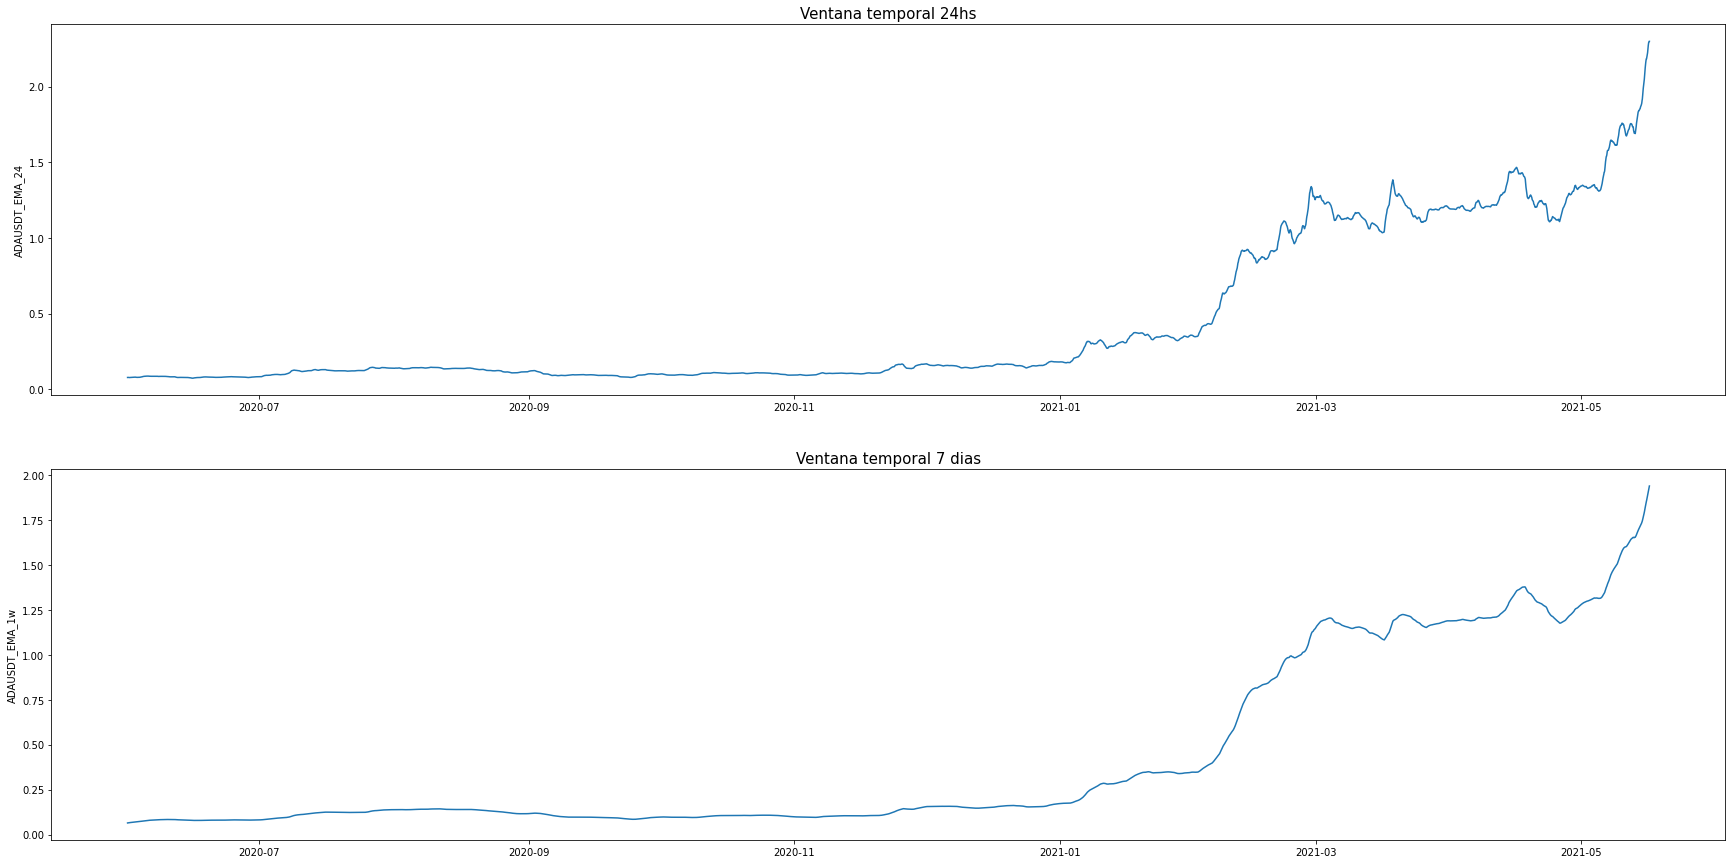

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(30,15))
plt.title('EMA para los últimos 12 meses de ADAUSDT', fontsize=20, pad=30)
sns.lineplot(data=EMA_day.ADAUSDT_EMA_24.last('12M'), ax=axes[0])
sns.lineplot(data=EMA_week.ADAUSDT_EMA_1w.last('12M'), ax=axes[1])
axes[0].set_title('Ventana temporal 24hs', fontsize=15)
axes[1].set_title('Ventana temporal 7 dias', fontsize=15)

In [ ]:
ADX_day = pd.DataFrame(index=close_criptos.index)
ADX_week = pd.DataFrame(index=close_criptos.index)

for h in close_criptos.columns:
  ADX_day[h] = talib.ADX(high_criptos[h], low_criptos[h], close_criptos[h], timeperiod=24)
  ADX_week[h] = talib.ADX(high_criptos[h], low_criptos[h], close_criptos[h], timeperiod=24*7)

In [ ]:
ADX_day.columns = [f'{i}_ADX_24' for i in ADX_day.columns]
ADX_week.columns = [f'{i}_ADX_1w' for i in ADX_week.columns]

Text(0.5, 1.0, 'Ventana temporal 7 dias')

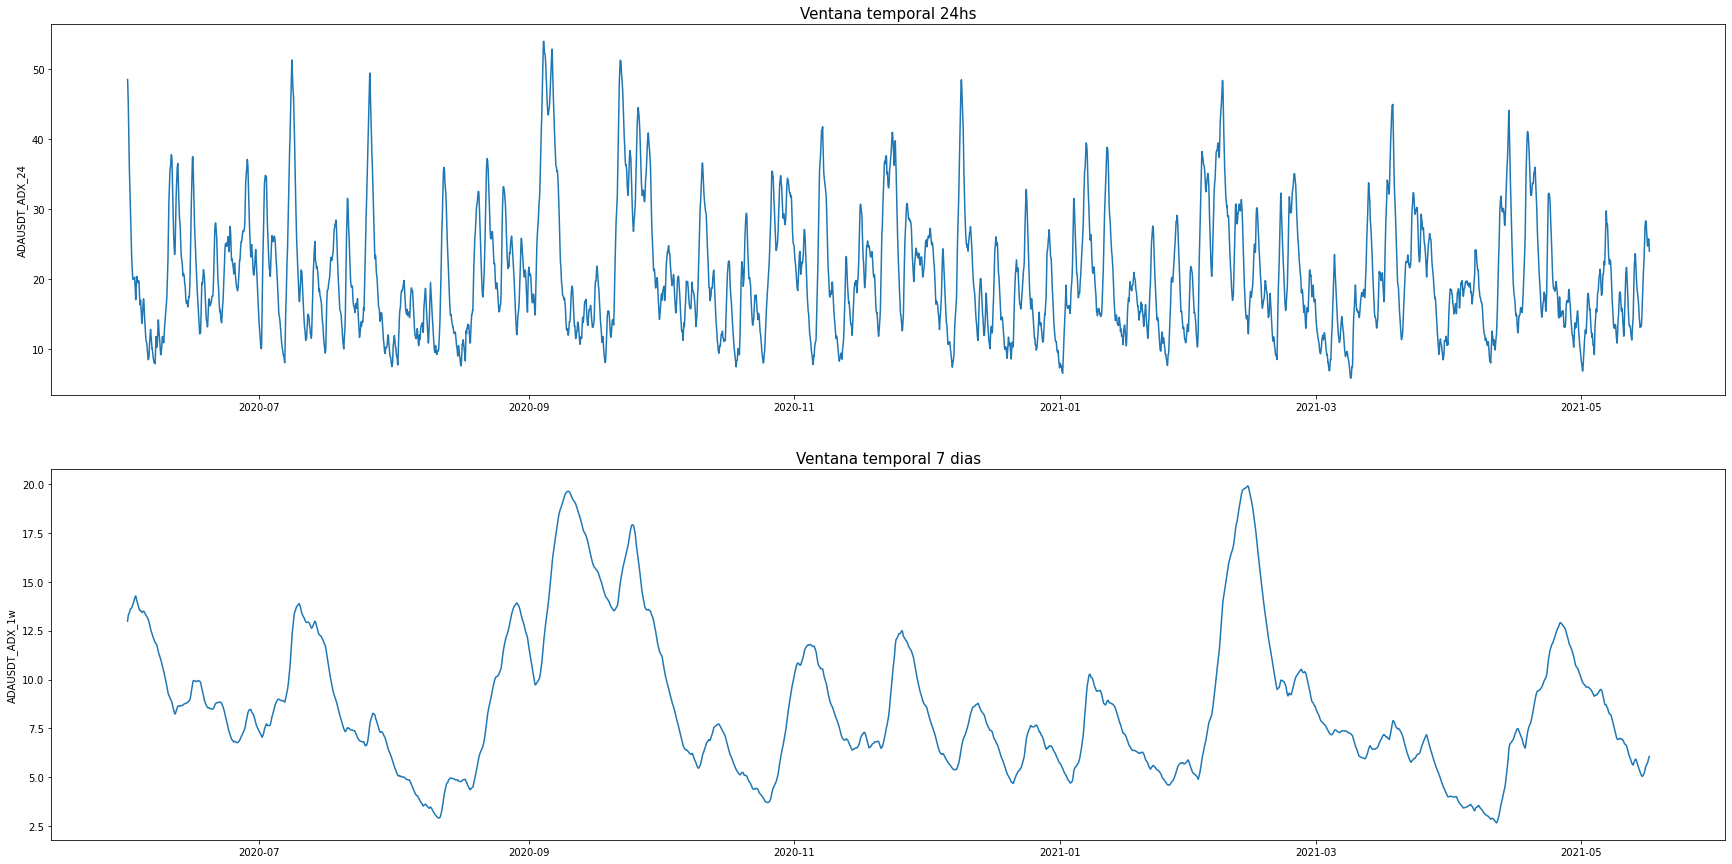

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(30,15))
plt.title('ADX para los últimos 12 meses de ADAUSDT', fontsize=20, pad=30)
sns.lineplot(data=ADX_day.ADAUSDT_ADX_24.last('12M'), ax=axes[0])
sns.lineplot(data=ADX_week.ADAUSDT_ADX_1w.last('12M'), ax=axes[1])
axes[0].set_title('Ventana temporal 24hs', fontsize=15)
axes[1].set_title('Ventana temporal 7 dias', fontsize=15)

**Otros indicadores**

In [ ]:
close_cols = [i for i in df_full.columns if i.find('close')>0]

In [ ]:
# medias móviles de 3, 15 y 60 periodos
df_close_MA_otros = pd.DataFrame(index=df_full.index)
for w in [3,15,60]:
    temp = df_full[close_cols].shift(1).rolling(window=w).mean()
    temp.columns = [f'{i}_MA_{w}' for i in temp.columns]
    df_close_MA_otros = pd.concat([df_close_MA_otros, temp], axis=1)
df_close_MA_otros

,AAVEUSDT_close_MA_3,ADAUSDT_close_MA_3,BCHUSDT_close_MA_3,BNBUSDT_close_MA_3,BTCUSDT_close_MA_3,COMPUSDT_close_MA_3,DASHUSDT_close_MA_3,DOTUSDT_close_MA_3,EOSUSDT_close_MA_3,ETCUSDT_close_MA_3,ETHUSDT_close_MA_3,LINKUSDT_close_MA_3,LTCUSDT_close_MA_3,MKRUSDT_close_MA_3,NEOUSDT_close_MA_3,XMRUSDT_close_MA_3,AAVEUSDT_close_MA_15,ADAUSDT_close_MA_15,BCHUSDT_close_MA_15,BNBUSDT_close_MA_15,BTCUSDT_close_MA_15,COMPUSDT_close_MA_15,DASHUSDT_close_MA_15,DOTUSDT_close_MA_15,EOSUSDT_close_MA_15,ETCUSDT_close_MA_15,ETHUSDT_close_MA_15,LINKUSDT_close_MA_15,LTCUSDT_close_MA_15,MKRUSDT_close_MA_15,NEOUSDT_close_MA_15,XMRUSDT_close_MA_15,AAVEUSDT_close_MA_60,ADAUSDT_close_MA_60,BCHUSDT_close_MA_60,BNBUSDT_close_MA_60,BTCUSDT_close_MA_60,COMPUSDT_close_MA_60,DASHUSDT_close_MA_60,DOTUSDT_close_MA_60,EOSUSDT_close_MA_60,ETCUSDT_close_MA_60,ETHUSDT_close_MA_60,LINKUSDT_close_MA_60,LTCUSDT_close_MA_60,MKRUSDT_close_MA_60,NEOUSDT_close_MA_60,XMRUSDT_close_MA_60
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,NaN,NaN,NaN,8.266433,13354.083333,NaN,NaN,NaN,NaN,NaN,723.213333,NaN,216.350000,NaN,73.179333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,NaN,NaN,NaN,8.261167,13314.423333,NaN,NaN,NaN,NaN,NaN,725.506667,NaN,215.730000,NaN,73.724000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16 11:00:00,552.893333,2.394167,1256.606667,598.433333,49248.136667,720.533333,359.036667,45.994667,10.932533,101.071000,3819.723333,44.058333,319.030000,4848.053333,99.506667,399.393333,539.910000,2.311820,1219.944667,581.775333,48378.662000,714.051333,350.564667,45.084600,10.663347,99.031000,3801.160000,43.028600,311.654667,4769.786000,96.222867,393.107333,558.434167,2.099397,1257.605333,589.777167,49286.222667,754.442667,361.087500,44.636233,10.890138,100.189767,3905.369167,44.549233,317.881167,4902.167500,97.882550,406.925333
2021-05-16 12:00:00,554.113333,2.381867,1258.743333,601.206667,49286.460000,722.613333,360.323333,45.871000,10.959633,101.432333,3817.223333,44.067333,319.883333,4856.766667,99.811333,400.886667,540.446000,2.318500,1222.948000,583.177333,48431.707333,714.287333,351.280000,45.031133,10.685487,99.195533,3801.041333,43.097867,312.213333,4773.958667,96.494200,393.388667,559.067667,2.106950,1257.396500,590.239000,49275.289667,753.621167,361.126000,44.723317,10.893650,100.386933,3906.565500,44.555233,317.872500,4902.881667,97.919183,406.868000
2021-05-16 13:00:00,546.713333,2.369700,1245.693333,598.053333,49072.436667,717.700000,358.996667,45.293667,10.818700,100.332667,3781.820000,43.689000,317.316667,4821.623333,99.060000,398.416667,539.785333,2.323207,1223.744000,583.748000,48445.231333,713.446667,351.490000,44.980600,10.681427,99.118400,3794.425333,43.121600,312.280667,4771.098667,96.608000,393.180667,559.028667,2.114517,1256.597500,590.355833,49251.837000,752.328000,360.946167,44.776467,10.882762,100.535667,3904.648500,44.537800,317.752167,4900.756167,97.899950,406.626500
2021-05-16 14:00:00,539.123333,2.353767,1237.810000,594.036667,48851.113333,709.556667,

In [ ]:
df_high_open = high_criptos-close_criptos
df_high_open.columns = [f'{i}_h_o' for i in df_high_open.columns]

df_open_low = open_criptos-low_criptos
df_open_low.columns = [f'{i}_o_l' for i in df_open_low.columns]

La función shift desplaza n filas la serie/dataframe. 

In [ ]:
df_features = pd.concat([close_criptos.add_suffix('_close'),
                         df_full_pct,
                         df_full_MA_24,
                         df_full_MA_1w,
                         df_close_MA_otros,
                         RSI_day,
                         RSI_week,
                         EMA_day,
                         EMA_week,
                         ADX_day,
                         ADX_week,
                         df_high_open,
                         df_open_low], axis=1)
df_features = df_features[df_features.columns.sort_values()]
df_features.to_parquet('df_features.parquet')

In [ ]:
df_features.shape

(29560, 416)

# Parte 3

La diferencia entre escalar y normalizar es que cuando se escala se cambio el rango de una variable (de tipo numérico), cuando se normaliza, además del cambio del rango también se modifica la distribución de la variable.

El uso de una u otra dependerá del algoritmo que se quiera aplicar y la composición de los datos.

# Parte 4


In [ ]:
i = 'ADAUSDT'
technical_analysis = pd.concat([close_criptos[i], return_rates[i], moving_average_week[i], 
                              RSI_week[f'{i}_RSI_1w'], EMA_week[f'{i}_EMA_1w'], ADX_week[f'{i}_ADX_1w']], axis=1)

technical_analysis.columns =['closing_price','return_rate_day','moving_average_week','RSI_week','EMA_week','ADX_week']

technical_analysis.tail(10)

,closing_price,return_rate_day,moving_average_week,RSI_week,EMA_week,ADX_week
2021-05-16 06:00:00,2.3989,0.047738,1.854477,57.838805,1.891301,5.780538
2021-05-16 07:00:00,2.4134,0.006044,1.858513,57.980648,1.897480,5.822103
2021-05-16 08:00:00,2.4197,0.002610,1.862530,58.042346,1.903660,5.863420
2021-05-16 09:00:00,2.3744,-0.018721,1.866389,57.432345,1.909231,5.902354
2021-05-16 10:00:00,2.3884,0.005896,1.870360,57.570979,1.914902,5.941055
2021-05-16 11:00:00,2.3828,-0.002345,1.874243,57.495630,1.920439,5.979865
2021-05-16 12:00:00,2.3379,-0.018843,1.878053,56.895008,1.925379,6.007163
2021-05-16 13:00:00,2.3406,0.001155,1.881315,56.922230,1.930293,6.034298
2021-05-16 14:00:00,2.3188,-0.009314,1.884314,56.631729,1.934891,6.054820
2021-05-16 15:00:00,2.2943,-0.010566,1.887304,56.306845,1.939144,6.068136


En la matriz se observa que hay una correlación perfecta entre los indicadores de precio (precio de cierre, moving_average, EMA) por lo que no sería tan necesario contar con todas en un posterior análisis. En cambio la correlación entre los demás indicadores es cercana a 0, aunque es algo lógico considerando que son de distinta naturaleza.

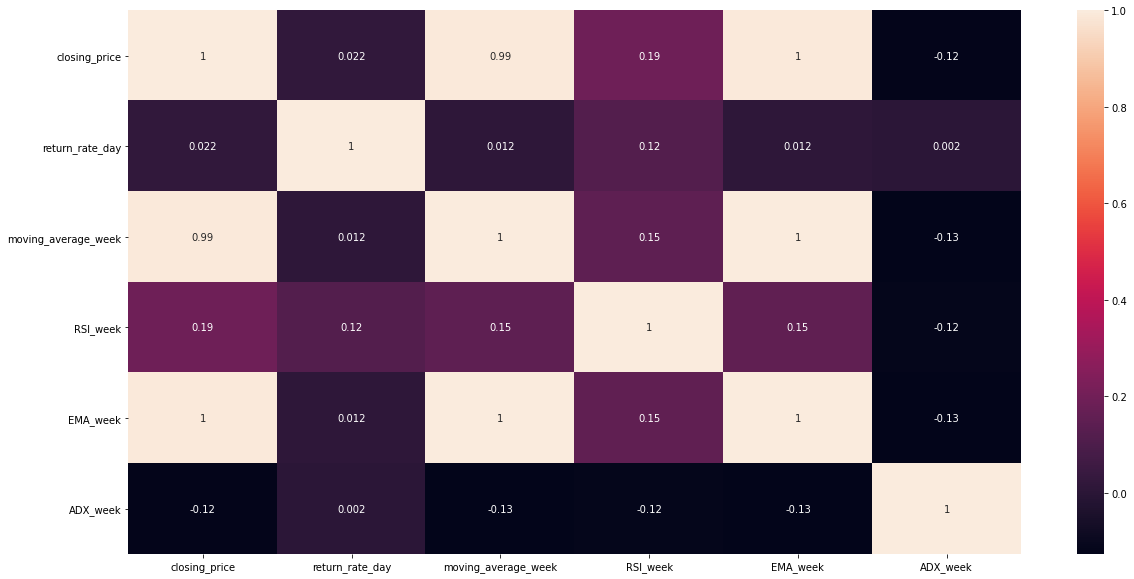

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(technical_analysis.corr(method='pearson'), annot = True)